<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/Stabiilty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

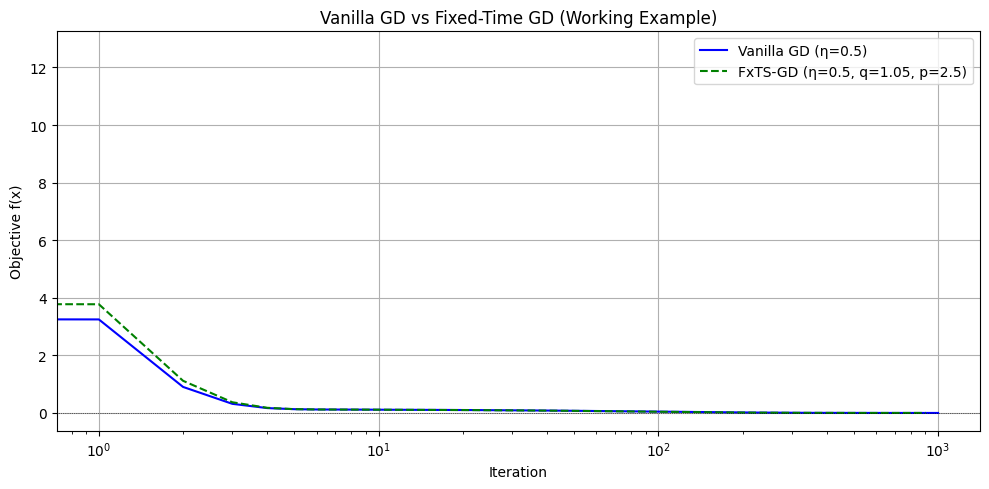

Vanilla GD converged in 1001 steps.
FxTS-GD converged in 905 steps.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective: Quadratic bowl
def f(x):
    return 0.5 * (x[0]**2 + 0.01 * x[1]**2)

def grad_f(x):
    return np.array([x[0], 0.01 * x[1]])

# Parameters
eta_gd = 0.5         # Step size for vanilla GD
eta_fx = 0.5         # Step size for fixed-time GD
p = 2.5
q = 1.05             # Very fast convergence
eps = 1e-6
max_iters = 1000     # Cap

# Initial condition
x0 = np.array([5.0, 5.0])

# Vanilla GD
x_gd = x0.copy()
f_vals_gd = [f(x_gd)]
for _ in range(max_iters):
    if f_vals_gd[-1] <= eps:
        break
    x_gd = x_gd - eta_gd * grad_f(x_gd)
    f_vals_gd.append(f(x_gd))

# FxTS GD
x_fx = x0.copy()
f_vals_fx = [f(x_fx)]
for _ in range(max_iters):
    f_val = f(x_fx)
    if f_val <= eps:
        break
    scale = f_val ** (-(q - 1) / (p - 1))
    x_fx = x_fx - eta_fx * grad_f(x_fx) * scale
    f_vals_fx.append(f(x_fx))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(f_vals_gd, label=f"Vanilla GD (η={eta_gd})", color="blue")
plt.plot(f_vals_fx, label=f"FxTS-GD (η={eta_fx}, q={q}, p={p})", color="green", linestyle="--")
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.xlabel("Iteration")
plt.ylabel("Objective f(x)")
plt.title("Vanilla GD vs Fixed-Time GD (Working Example)")
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print result
print(f"Vanilla GD converged in {len(f_vals_gd)} steps.")
print(f"FxTS-GD converged in {len(f_vals_fx)} steps.")


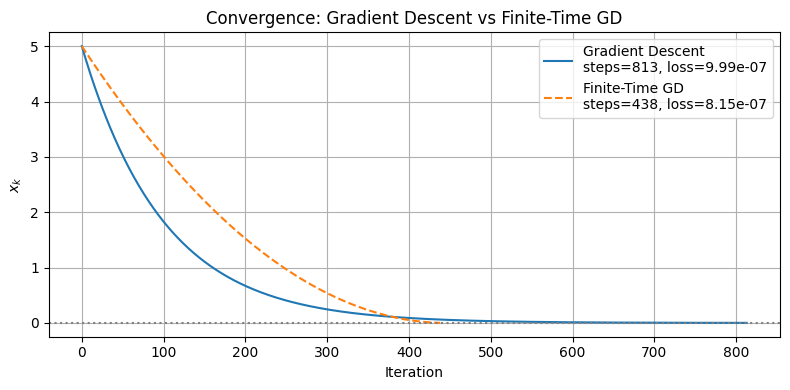

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Objective Function ---
def f(x):
    return 0.5 * x**2

def grad_f(x):
    return x

# --- Gradient Descent Update ---
def gd_update(x, eta):
    return x - eta * grad_f(x)

# --- Finite-Time Gradient Descent Update ---
def ftgd_update(x, eta, gamma):
    grad = grad_f(x)
    norm_grad = np.abs(grad)
    if norm_grad < 1e-12:
        return x
    return x - eta * grad / (norm_grad ** gamma)

# --- Parameters ---
x0 = 5.0
eta = 0.01
gamma = 0.5
max_steps = 1000
tol = 1e-6

# --- Gradient Descent Simulation ---
x_gd = [x0]
x_curr = x0
for k in range(max_steps):
    x_next = gd_update(x_curr, eta)
    x_gd.append(x_next)
    if f(x_next) <= tol:
        break
    x_curr = x_next
gd_steps = len(x_gd) - 1
gd_loss = f(x_gd[-1])

# --- Finite-Time Gradient Descent Simulation ---
x_ftgd = [x0]
x_curr = x0
for k in range(max_steps):
    x_next = ftgd_update(x_curr, eta, gamma)
    x_ftgd.append(x_next)
    if f(x_next) <= tol:
        break
    x_curr = x_next
ftgd_steps = len(x_ftgd) - 1
ftgd_loss = f(x_ftgd[-1])

# --- Plotting ---
plt.figure(figsize=(8, 4))
plt.plot(x_gd, label=f'Gradient Descent\nsteps={gd_steps}, loss={gd_loss:.2e}')
plt.plot(x_ftgd, label=f'Finite-Time GD\nsteps={ftgd_steps}, loss={ftgd_loss:.2e}', linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel('Iteration')
plt.ylabel('$x_k$')
plt.title('Convergence: Gradient Descent vs Finite-Time GD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


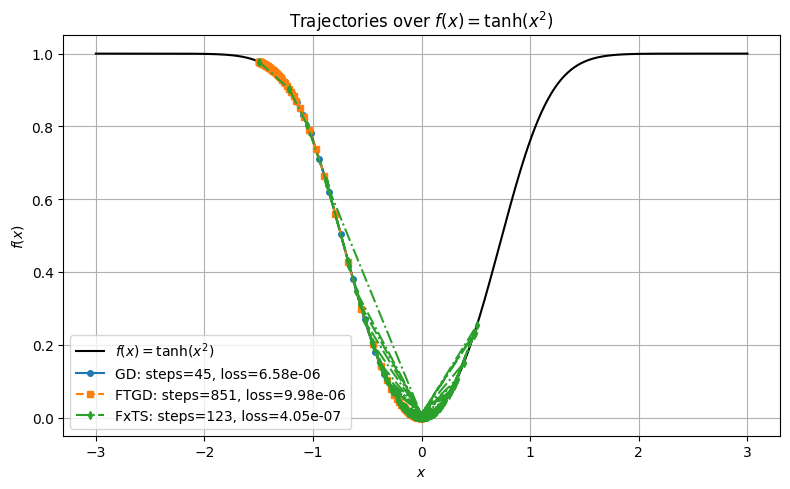

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function and Gradient ---
def f(x):
    return np.tanh(x**2)

def grad_f(x):
    return 2 * x * (1 - np.tanh(x**2)**2)

# --- Update Rules ---
def gd_update(x, eta):
    return x - eta * grad_f(x)

def ftgd_update(x, eta, gamma):
    g = grad_f(x)
    norm_g = np.abs(g)
    if norm_g < 1e-12:
        return x
    return x - eta * g / (norm_g ** gamma)

def fxts_update(x, eta1, eta2, gamma1, gamma2):
    g = grad_f(x)
    norm_g = np.abs(g)
    if norm_g < 1e-12:
        return x
    return x - eta1 * g / (norm_g ** gamma1) - eta2 * g / (norm_g ** gamma2)

# --- Parameters ---
x0 = -1.5
max_steps = 1000
tol = 1e-5

# Shared parameters
eta = 0.1
p = 1.5
gamma = (p - 2) / (p - 1)  # = -1

# FxTS specific
eta1 = eta
eta2 = eta
gamma1 = gamma
gamma2 = 1.5

# --- Run GD ---
x_gd = [x0]
fx_gd = [f(x0)]
x_curr = x0
for _ in range(max_steps):
    x_next = gd_update(x_curr, eta)
    x_gd.append(x_next)
    fx_gd.append(f(x_next))
    if f(x_next) <= tol:
        break
    x_curr = x_next
gd_steps = len(fx_gd) - 1
gd_final_loss = fx_gd[-1]

# --- Run FTGD ---
x_ft = [x0]
fx_ft = [f(x0)]
x_curr = x0
for _ in range(max_steps):
    x_next = ftgd_update(x_curr, eta, gamma)
    x_ft.append(x_next)
    fx_ft.append(f(x_next))
    if f(x_next) <= tol:
        break
    x_curr = x_next
ft_steps = len(fx_ft) - 1
ft_final_loss = fx_ft[-1]

# --- Run FxTS ---
x_fx = [x0]
fx_fx = [f(x0)]
x_curr = x0
for _ in range(max_steps):
    x_next = fxts_update(x_curr, eta1, eta2, gamma1, gamma2)
    x_fx.append(x_next)
    fx_fx.append(f(x_next))
    if f(x_next) <= tol:
        break
    x_curr = x_next
fx_steps = len(fx_fx) - 1
fx_final_loss = fx_fx[-1]

# --- Plot Function + Trajectories ---
x_vals = np.linspace(-3, 3, 400)
f_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_vals, label='$f(x) = \\tanh(x^2)$', color='black')
plt.plot(x_gd, fx_gd, 'o-', label=f'GD: steps={gd_steps}, loss={gd_final_loss:.2e}', markersize=4)
plt.plot(x_ft, fx_ft, 's--', label=f'FTGD: steps={ft_steps}, loss={ft_final_loss:.2e}', markersize=4)
plt.plot(x_fx, fx_fx, 'd-.', label=f'FxTS: steps={fx_steps}, loss={fx_final_loss:.2e}', markersize=4)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Trajectories over $f(x) = \\tanh(x^2)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


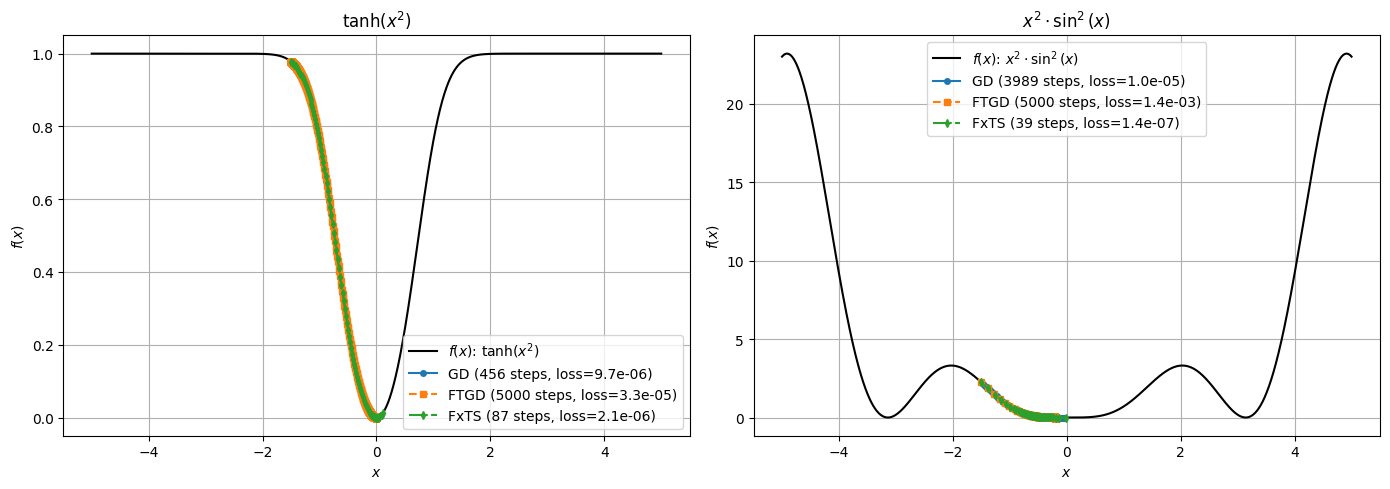

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return np.tanh(x**2)

def grad_f1(x):
    return 2 * x * (1 - np.tanh(x**2)**2)

def f2(x):
    return np.nan_to_num((x**2) * (np.sin(x)**2), nan=1e6, posinf=1e6, neginf=1e6)

def grad_f2(x):
    g = 2 * x * (np.sin(x)**2) + x**2 * np.sin(2 * x)
    return np.nan_to_num(g, nan=0.0, posinf=1e3, neginf=-1e3)

def gd_update(x, eta, grad_f):
    return np.clip(x - eta * grad_f(x), -20, 20)

def ftgd_update(x, eta, gamma, grad_f):
    g = grad_f(x)
    norm_g = max(np.abs(g), 1e-8)
    return np.clip(x - eta * g / (norm_g ** gamma), -20, 20)

def fxts_update(x, eta1, eta2, gamma1, gamma2, grad_f):
    g = grad_f(x)
    norm_g = max(np.abs(g), 1e-8)
    return np.clip(x - eta1 * g / (norm_g ** gamma1) - eta2 * g / (norm_g ** gamma2), -20, 20)

def run_all(f, grad_f, label, ax):
    x0 = -1.5
    eta = 0.01
    p = 1.5
    gamma = (p - 2) / (p - 1)
    gamma1 = gamma
    gamma2 = 1.5
    eta1 = eta2 = eta
    tol = 1e-5
    max_steps = 5000

    x_gd, fx_gd = [x0], [f(x0)]
    x = x0
    for _ in range(max_steps):
        x = gd_update(x, eta, grad_f)
        x_gd.append(x)
        fx_gd.append(f(x))
        if f(x) < tol:
            break
    gd_steps = len(fx_gd) - 1
    gd_loss = fx_gd[-1]

    x_ft, fx_ft = [x0], [f(x0)]
    x = x0
    for _ in range(max_steps):
        x = ftgd_update(x, eta, gamma, grad_f)
        x_ft.append(x)
        fx_ft.append(f(x))
        if f(x) < tol:
            break
    ft_steps = len(fx_ft) - 1
    ft_loss = fx_ft[-1]

    x_fx, fx_fx = [x0], [f(x0)]
    x = x0
    for _ in range(max_steps):
        x = fxts_update(x, eta1, eta2, gamma1, gamma2, grad_f)
        x_fx.append(x)
        fx_fx.append(f(x))
        if f(x) < tol:
            break
    fx_steps = len(fx_fx) - 1
    fx_loss = fx_fx[-1]

    x_vals = np.linspace(-5, 5, 1000)
    f_vals = f(x_vals)

    ax.plot(x_vals, f_vals, label=f'$f(x)$: {label}', color='black')
    ax.plot(x_gd, fx_gd, 'o-', label=f'GD ({gd_steps} steps, loss={gd_loss:.1e})', markersize=4)
    ax.plot(x_ft, fx_ft, 's--', label=f'FTGD ({ft_steps} steps, loss={ft_loss:.1e})', markersize=4)
    ax.plot(x_fx, fx_fx, 'd-.', label=f'FxTS ({fx_steps} steps, loss={fx_loss:.1e})', markersize=4)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.set_title(label)
    ax.grid(True)
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
run_all(f1, grad_f1, r'$\tanh(x^2)$', axs[0])
run_all(f2, grad_f2, r'$x^2 \cdot \sin^2(x)$', axs[1])
plt.tight_layout()
plt.show()


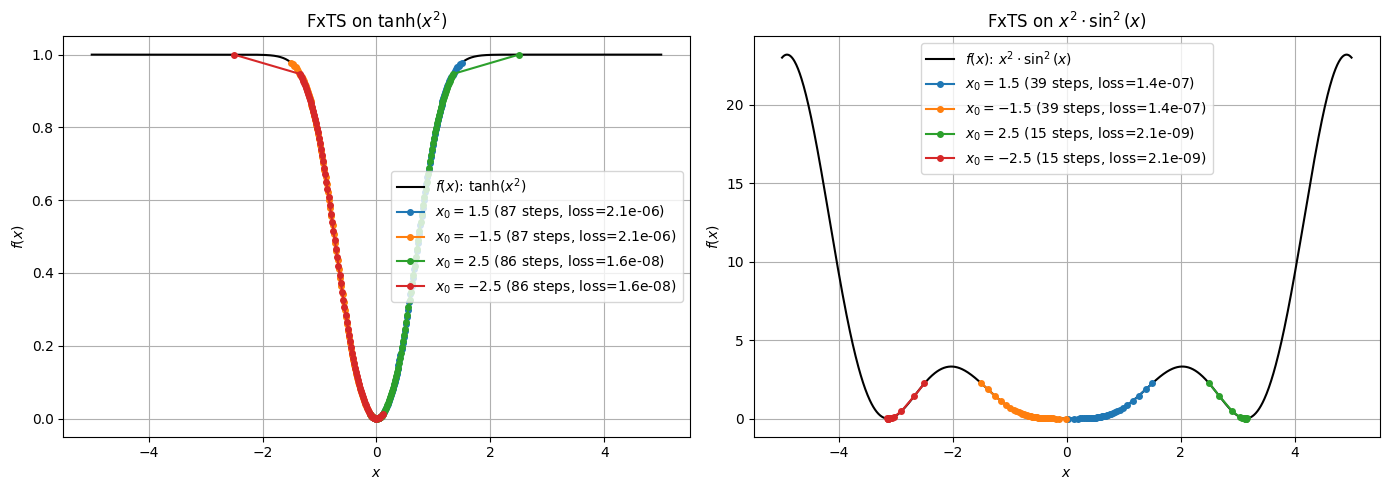

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function 1: tanh(x^2)
def f1(x):
    return np.tanh(x**2)

def grad_f1(x):
    return 2 * x * (1 - np.tanh(x**2)**2)

# Function 2: x^2 * sin^2(x)
def f2(x):
    return np.nan_to_num((x**2) * (np.sin(x)**2), nan=1e6, posinf=1e6, neginf=1e6)

def grad_f2(x):
    g = 2 * x * (np.sin(x)**2) + x**2 * np.sin(2 * x)
    return np.nan_to_num(g, nan=0.0, posinf=1e3, neginf=-1e3)

# FxTS update
def fxts_update(x, eta1, eta2, gamma1, gamma2, grad_f):
    g = grad_f(x)
    norm_g = max(np.abs(g), 1e-8)
    return np.clip(x - eta1 * g / (norm_g ** gamma1) - eta2 * g / (norm_g ** gamma2), -20, 20)

# Parameters
etas = (0.01, 0.01)
gammas = (-1, 1.5)
tol = 1e-5
max_steps = 1000
x0_list = [1.5, -1.5, 2.5, -2.5]

def run_fxts_all(f, grad_f, label):
    x_vals = np.linspace(-5, 5, 1000)
    f_vals = f(x_vals)
    plt.plot(x_vals, f_vals, color='black', label=f'$f(x)$: {label}')

    for x0 in x0_list:
        x = x0
        traj_x, traj_fx = [x0], [f(x0)]
        for _ in range(max_steps):
            x = fxts_update(x, *etas, *gammas, grad_f)
            traj_x.append(x)
            fx = f(x)
            traj_fx.append(fx)
            if fx < tol:
                break
        steps = len(traj_fx) - 1
        final_loss = traj_fx[-1]
        plt.plot(traj_x, traj_fx, marker='o', markersize=4, label=f'$x_0={x0}$ ({steps} steps, loss={final_loss:.1e})')

    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title(f'FxTS on {label}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
run_fxts_all(f1, grad_f1, r'$\tanh(x^2)$')

plt.subplot(1, 2, 2)
run_fxts_all(f2, grad_f2, r'$x^2 \cdot \sin^2(x)$')

plt.show()


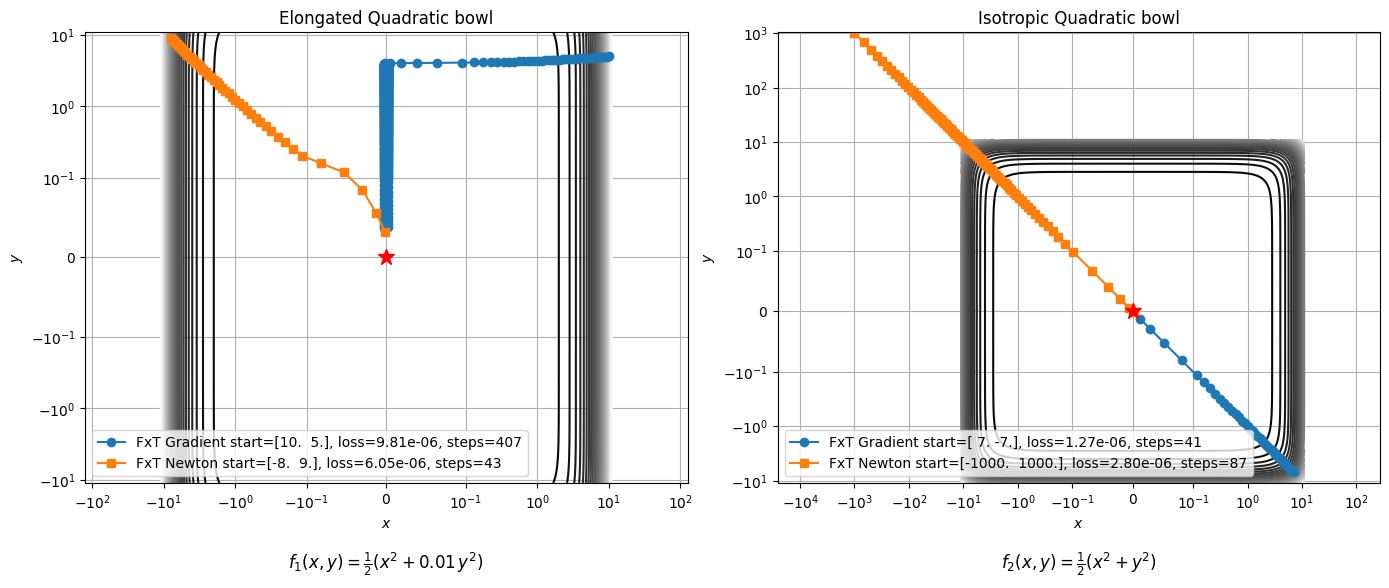

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function 1: elongated quadratic bowl
def f1(x): return 0.5 * (x[0]**2 + 0.01 * x[1]**2)
def grad_f1(x): return np.array([x[0], 0.01 * x[1]])
def hess_f1(x): return np.array([[1.0, 0.0], [0.0, 0.01]])

# Function 2: isotropic quadratic bowl
def f2(x): return 0.5 * (x[0]**2 + x[1]**2)
def grad_f2(x): return np.array([x[0], x[1]])
def hess_f2(x): return np.eye(2)

# Fixed-time gradient update
def fxt_gradient_update(x, grad_f, eta=0.1, mu=0.01, gamma1=0.5, gamma2=1.5):
    g = grad_f(x)
    g1 = np.sign(g) * np.abs(g)**gamma1
    g2 = np.sign(g) * np.abs(g)**gamma2
    return x - eta * g1 - mu * g2

# Fixed-time Newton update with damping
def damped_inverse(H, lam=1e-4):
    return np.linalg.inv(H + lam * np.eye(H.shape[0]))

def fxt_newton_update(x, grad_f, hess_f, eta=0.1, mu=0.01, gamma1=0.5, gamma2=1.5):
    H_inv = damped_inverse(hess_f(x))
    d = H_inv @ grad_f(x)
    d1 = np.sign(d) * np.abs(d)**gamma1
    d2 = np.sign(d) * np.abs(d)**gamma2
    return x - eta * d1 - mu * d2

# Run until tolerance
def run_trajectory(update_fn, f, x0, tol=1e-5, max_steps=1000):
    traj = [x0.copy()]
    x = x0.copy()
    for _ in range(max_steps):
        if f(x) < tol:
            break
        x = update_fn(x)
        traj.append(x.copy())
    return np.array(traj)

# Plot
def plot_comparison(ax, f, traj_gd, traj_nt, title, equation_text, log_scale=False):
    x = np.linspace(-11, 11, 300)
    y = np.linspace(-11, 11, 300)
    X, Y = np.meshgrid(x, y)
    Z = np.vectorize(lambda x, y: f([x, y]))(X, Y)
    ax.contour(X, Y, Z, levels=30, cmap='gray')

    ax.plot(traj_gd[:, 0], traj_gd[:, 1], 'o-', label=f"FxT Gradient start={traj_gd[0]}, loss={f(traj_gd[-1]):.2e}, steps={len(traj_gd)-1}")
    ax.plot(traj_nt[:, 0], traj_nt[:, 1], 's-', label=f"FxT Newton start={traj_nt[0]}, loss={f(traj_nt[-1]):.2e}, steps={len(traj_nt)-1}")

    ax.plot(0, 0, 'r*', markersize=12)
    ax.set_title(title)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.axis('equal')
    ax.grid(True)
    ax.legend()

    if log_scale:
        ax.set_xscale('symlog', linthresh=0.1)
        ax.set_yscale('symlog', linthresh=0.1)

    # Add function equation text below plot inside figure area
    ax.text(0.5, -0.15, equation_text, ha='center', va='top', transform=ax.transAxes, fontsize=12)

tol = 1e-5

# Starting points
x0_gd_1 = np.array([10.0, 5.0])
x0_nt_1 = np.array([-8.0, 9.0])

x0_gd_2 = np.array([7.0, -7.0])
x0_nt_2 = np.array([-1000.0, 1000.0])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

traj_gd_1 = run_trajectory(lambda x: fxt_gradient_update(x, grad_f1), f1, x0_gd_1, tol)
traj_nt_1 = run_trajectory(lambda x: fxt_newton_update(x, grad_f1, hess_f1), f1, x0_nt_1, tol)
plot_comparison(
    axes[0], f1, traj_gd_1, traj_nt_1, 'Elongated Quadratic bowl',
    r'$f_1(x,y) = \frac{1}{2}(x^2 + 0.01\,y^2)$',
    log_scale=True)

traj_gd_2 = run_trajectory(lambda x: fxt_gradient_update(x, grad_f2), f2, x0_gd_2, tol)
traj_nt_2 = run_trajectory(lambda x: fxt_newton_update(x, grad_f2, hess_f2), f2, x0_nt_2, tol)
plot_comparison(
    axes[1], f2, traj_gd_2, traj_nt_2, 'Isotropic Quadratic bowl',
    r'$f_2(x,y) = \frac{1}{2}(x^2 + y^2)$', log_scale=True)

plt.tight_layout()
plt.show()


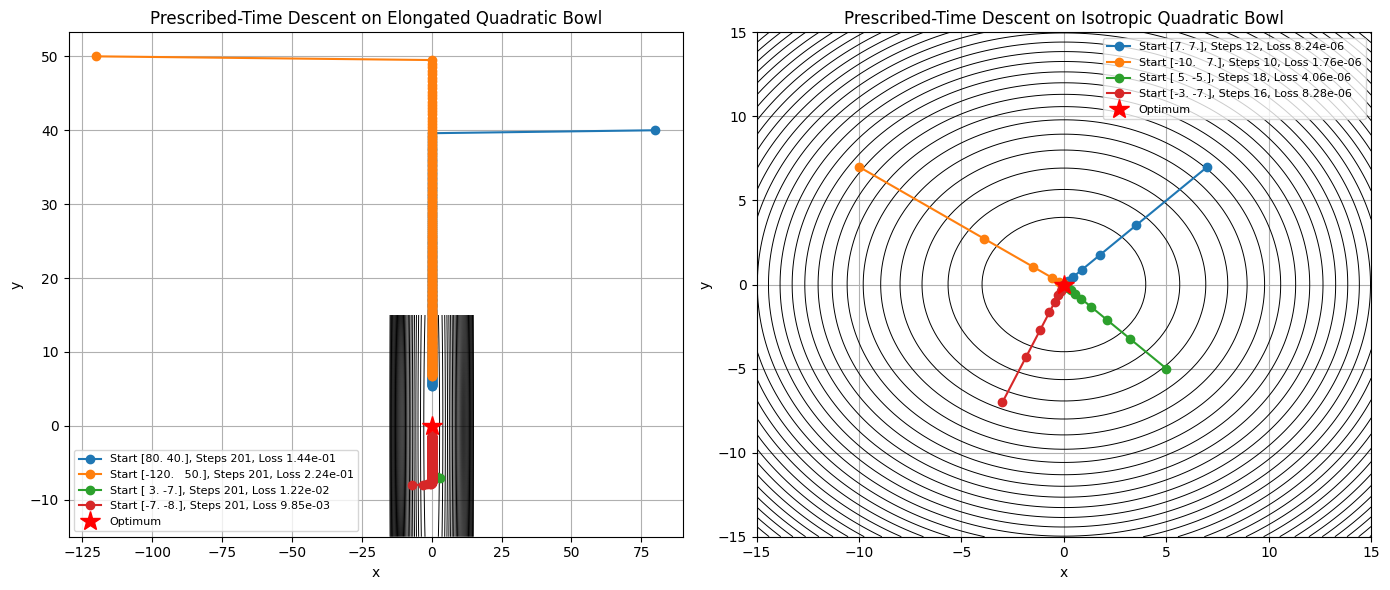

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Functions and gradients
def f1(x): return 0.5 * (x[0]**2 + 0.01 * x[1]**2)
def grad_f1(x): return np.array([x[0], 0.01 * x[1]])

def f2(x): return 0.5 * (x[0]**2 + x[1]**2)
def grad_f2(x): return np.array([x[0], x[1]])

def prescribed_time_update(x, grad_f, t, T, c=0.1, alpha_max=1.0):
    alpha = c / max(T - t, 1e-3)  # larger epsilon to avoid explosion
    alpha = min(alpha, alpha_max)  # cap step size
    return x - alpha * grad_f(x)

def run_trajectory(f, grad_f, x0, T, c=0.1, dt=0.01, tol=1e-5, max_steps=1000):
    traj = [x0.copy()]
    x = x0.copy()
    t = 0
    for i in range(max_steps):
        if f(x) < tol or t >= T:
            break
        x = prescribed_time_update(x, grad_f, t, T, c)
        traj.append(x.copy())
        t += dt
    return np.array(traj), i+1, f(x)

# Starting points for each function (uneven distances)
starts_f1 = [
    np.array([80.0, 40.0]),
    np.array([-120.0, 50.0]),
    np.array([3.0, -7.0]),
    np.array([-7.0, -8.0]),
]

starts_f2 = [
    np.array([7.0, 7.0]),
    np.array([-10.0, 7.0]),
    np.array([5.0, -5.0]),
    np.array([-3.0, -7.0]),
]

T = 2.0  # Prescribed total time
base_c = 0.1  # base tuning parameter
dt = 0.01

plt.figure(figsize=(14, 6))

# Plot for f1
x_range = np.linspace(-15, 15, 100)
y_range = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x_range, y_range)
Z1 = np.vectorize(lambda x, y: f1(np.array([x, y])))(X, Y)

plt.subplot(1, 2, 1)
plt.contour(X, Y, Z1, levels=30, colors='black', linewidths=0.7)
for x0 in starts_f1:
    dist = np.linalg.norm(x0)
    c = base_c * dist  # scale c by distance from optimum
    traj, steps, final_loss = run_trajectory(f1, grad_f1, x0, T, c, dt)
    plt.plot(traj[:, 0], traj[:, 1], '-o', label=f'Start {x0}, Steps {steps}, Loss {final_loss:.2e}')
plt.plot(0, 0, 'r*', markersize=15, label='Optimum')
plt.title('Prescribed-Time Descent on Elongated Quadratic Bowl')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=8)
plt.grid(True)

# Plot for f2
Z2 = np.vectorize(lambda x, y: f2(np.array([x, y])))(X, Y)

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z2, levels=30, colors='black', linewidths=0.7)
for x0 in starts_f2:
    dist = np.linalg.norm(x0)
    c = base_c * dist  # scale c by distance from optimum
    traj, steps, final_loss = run_trajectory(f2, grad_f2, x0, T, c, dt)
    plt.plot(traj[:, 0], traj[:, 1], '-o', label=f'Start {x0}, Steps {steps}, Loss {final_loss:.2e}')
plt.plot(0, 0, 'r*', markersize=15, label='Optimum')
plt.title('Prescribed-Time Descent on Isotropic Quadratic Bowl')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=8)
plt.grid(True)

plt.tight_layout()
plt.show()


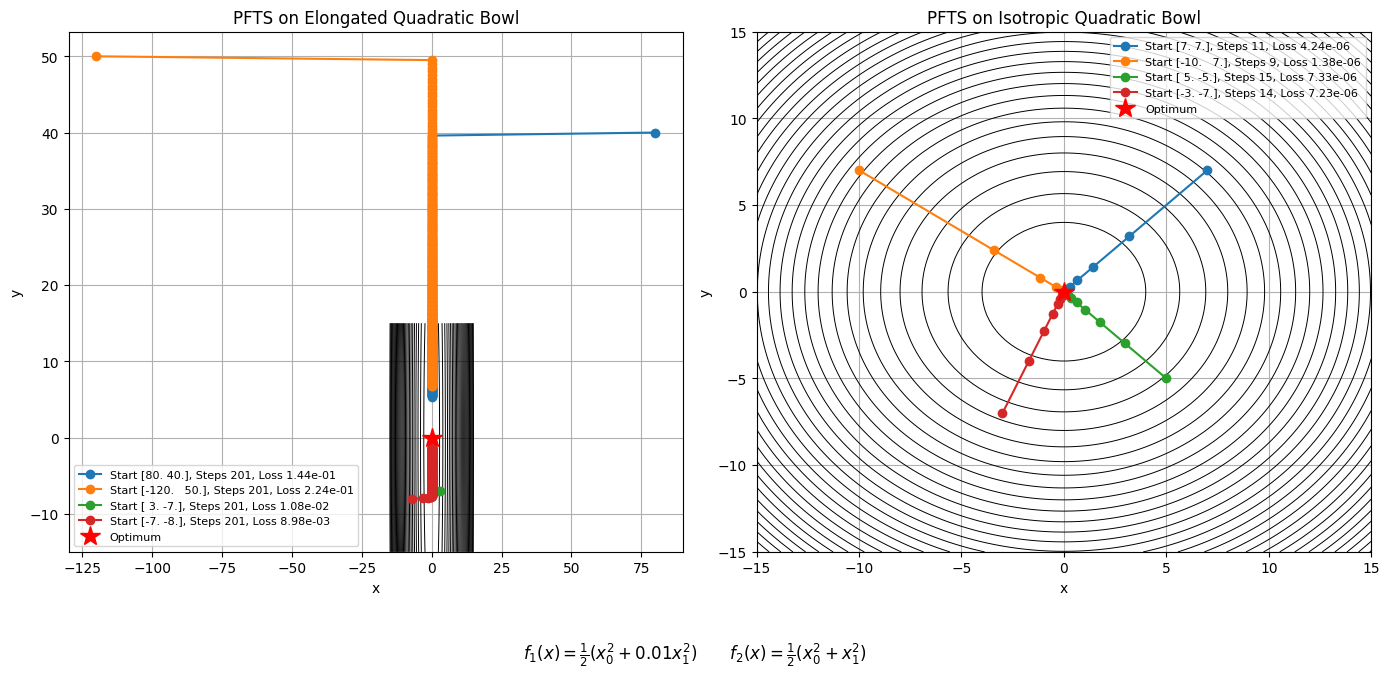

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Functions and gradients
def f1(x): return 0.5 * (x[0]**2 + 0.01 * x[1]**2)
def grad_f1(x): return np.array([x[0], 0.01 * x[1]])

def f2(x): return 0.5 * (x[0]**2 + x[1]**2)
def grad_f2(x): return np.array([x[0], x[1]])

# Prescribed + Fixed-Time update
def pfts_update(x, grad_f, t, T, c1=0.1, c2=0.05, alpha_max=1.0):
    denom = max(T - t, 1e-3)
    alpha = (c1 / denom) + c2
    alpha = min(alpha, alpha_max)
    return x - alpha * grad_f(x)

def run_trajectory(f, grad_f, x0, T, c1=0.1, c2=0.05, dt=0.01, tol=1e-5, max_steps=1000):
    traj = [x0.copy()]
    x = x0.copy()
    t = 0
    for i in range(max_steps):
        if f(x) < tol or t >= T:
            break
        x = pfts_update(x, grad_f, t, T, c1, c2)
        traj.append(x.copy())
        t += dt
    return np.array(traj), i+1, f(x)

# Starting points (uneven distances)
starts_f1 = [
    np.array([80.0, 40.0]),
    np.array([-120.0, 50.0]),
    np.array([3.0, -7.0]),
    np.array([-7.0, -8.0]),
]

starts_f2 = [
    np.array([7.0, 7.0]),
    np.array([-10.0, 7.0]),
    np.array([5.0, -5.0]),
    np.array([-3.0, -7.0]),
]

T = 2.0         # Prescribed time
base_c1 = 0.1   # Prescribed component
c2 = 0.05       # Fixed-time safety net
dt = 0.01

plt.figure(figsize=(14, 7))

# Plot for f1
x_range = np.linspace(-15, 15, 100)
y_range = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x_range, y_range)
Z1 = np.vectorize(lambda x, y: f1(np.array([x, y])))(X, Y)

plt.subplot(1, 2, 1)
plt.contour(X, Y, Z1, levels=30, colors='black', linewidths=0.7)
for x0 in starts_f1:
    dist = np.linalg.norm(x0)
    c1 = base_c1 * dist  # scale prescribed part
    traj, steps, final_loss = run_trajectory(f1, grad_f1, x0, T, c1, c2, dt)
    plt.plot(traj[:, 0], traj[:, 1], '-o', label=f'Start {x0}, Steps {steps}, Loss {final_loss:.2e}')
plt.plot(0, 0, 'r*', markersize=15, label='Optimum')
plt.title('PFTS on Elongated Quadratic Bowl')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=8)
plt.grid(True)

# Plot for f2
Z2 = np.vectorize(lambda x, y: f2(np.array([x, y])))(X, Y)

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z2, levels=30, colors='black', linewidths=0.7)
for x0 in starts_f2:
    dist = np.linalg.norm(x0)
    c1 = base_c1 * dist
    traj, steps, final_loss = run_trajectory(f2, grad_f2, x0, T, c1, c2, dt)
    plt.plot(traj[:, 0], traj[:, 1], '-o', label=f'Start {x0}, Steps {steps}, Loss {final_loss:.2e}')
plt.plot(0, 0, 'r*', markersize=15, label='Optimum')
plt.title('PFTS on Isotropic Quadratic Bowl')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=8)
plt.grid(True)

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.figtext(0.5, 0.05,
            r'$f_1(x) = \frac{1}{2}(x_0^2 + 0.01 x_1^2) \quad \quad f_2(x) = \frac{1}{2}(x_0^2 + x_1^2)$',
            ha='center', fontsize=12)

plt.show()


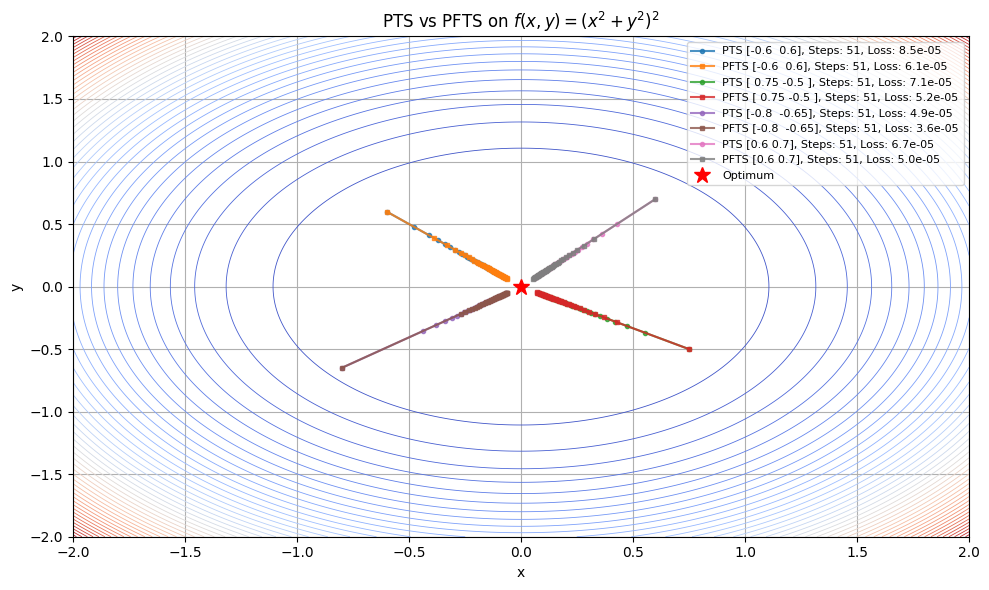

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function and gradient ---
def f_flat(x):
    return (x[0]**2 + x[1]**2)**2

def grad_f_flat(x):
    r2 = x[0]**2 + x[1]**2
    grad = 4 * r2 * np.array([x[0], x[1]])
    return np.clip(grad, -100, 100)

# --- Update rules ---
def pts_update(x, grad_f, t, T, c1=0.05, alpha_max=1.0, step_clip=1.0):
    denom = max(T - t, 1e-3)
    alpha = min(c1 / denom, alpha_max)
    step = -alpha * grad_f(x)
    return x + np.clip(step, -step_clip, step_clip)

def pfts_update(x, grad_f, t, T, c1=0.05, c2=0.05, alpha_max=1.0, step_clip=1.0):
    denom = max(T - t, 1e-3)
    alpha = min((c1 / denom) + c2, alpha_max)
    step = -alpha * grad_f(x)
    return x + np.clip(step, -step_clip, step_clip)

# --- Run trajectory and collect steps ---
def run_trajectory(f, grad_f, x0, T, update_rule, c1=0.05, c2=0.05, dt=0.01, max_steps=1000):
    traj = [x0.copy()]
    x = x0.copy()
    t = 0
    for i in range(max_steps):
        if f(x) < 1e-6 or t >= T:
            break
        if update_rule == "PTS":
            x = pts_update(x, grad_f, t, T, c1)
        elif update_rule == "PFTS":
            x = pfts_update(x, grad_f, t, T, c1, c2)
        traj.append(x.copy())
        t += dt
    return np.array(traj), i+1, f(x)

# --- Parameters ---
T = 0.5
dt = 0.01
base_c1 = 0.05
c2 = 0.05
starts = [
    np.array([-1.2, 1.2])/2,
    np.array([1.5, -1.0])/2,
    np.array([-1.6, -1.3])/2,
    np.array([1.2, 1.4])/2,
]

# --- Function grid for contours ---
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X**2 + Y**2)**2

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='coolwarm', linewidths=0.6)

for x0 in starts:
    dist = np.linalg.norm(x0)
    c1 = base_c1 * dist**2

    traj_pts, steps_pts, loss_pts = run_trajectory(f_flat, grad_f_flat, x0, T, "PTS", c1, c2, dt)
    traj_pfts, steps_pfts, loss_pfts = run_trajectory(f_flat, grad_f_flat, x0, T, "PFTS", c1, c2, dt)

    plt.plot(traj_pts[:, 0], traj_pts[:, 1], 'o-', label=f'PTS {x0}, Steps: {steps_pts}, Loss: {loss_pts:.1e}', markersize=3, alpha=0.8)
    plt.plot(traj_pfts[:, 0], traj_pfts[:, 1], 's-', label=f'PFTS {x0}, Steps: {steps_pfts}, Loss: {loss_pfts:.1e}', markersize=3, alpha=0.8)

plt.plot(0, 0, 'r*', markersize=12, label='Optimum')
plt.title(r"PTS vs PFTS on $f(x, y) = (x^2 + y^2)^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


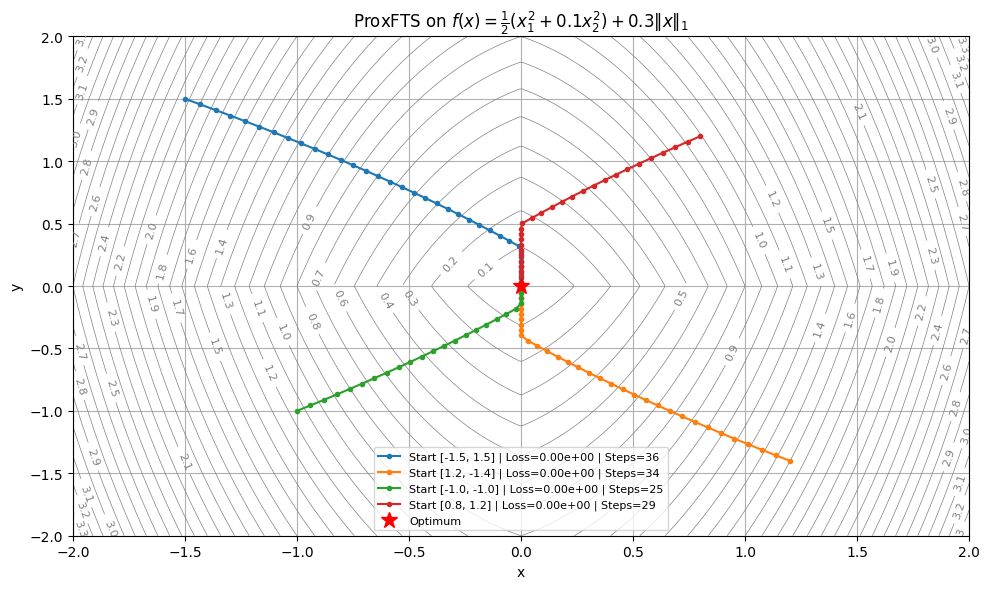

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Objective function and gradient ---
def f(x):
    return 0.5 * (x[0]**2 + 0.1 * x[1]**2) + 0.3 * np.linalg.norm(x, ord=1)

def grad_f(x):
    grad = np.array([x[0], 0.1 * x[1]])
    subgrad_l1 = np.sign(x)
    return grad + 0.3 * subgrad_l1

# --- Proximal operator for L1 regularizer ---
def prox_l1(z, lam):
    return np.sign(z) * np.maximum(np.abs(z) - lam, 0.0)

# --- ProxFTS update rule ---
def proxfts_update(x, grad_f, t, T, eta=0.1, c1=0.2, c2=0.05, gamma1=0.5, gamma2=1.5, lam=0.3):
    grad = grad_f(x)
    v = c1 * np.power(np.abs(grad), gamma1) * np.sign(grad) + c2 * np.power(np.abs(grad), gamma2) * np.sign(grad)
    z = x - eta * v
    return prox_l1(z, eta * lam)

# --- Run simulation ---
def run_proxfts(x0, T=2.0, dt=0.01, tol=1e-5):
    traj = [x0.copy()]
    t = 0
    x = x0.copy()
    while t < T:
        x = proxfts_update(x, grad_f, t, T)
        traj.append(x.copy())
        if f(x) < tol:
            break
        t += dt
    return np.array(traj), f(x), len(traj)

# --- Visualize contour + trajectory ---
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 0.1 * Y**2) + 0.3 * (np.abs(X) + np.abs(Y))

starts = [
    np.array([-1.5, 1.5]),
    np.array([1.2, -1.4]),
    np.array([-1.0, -1.0]),
    np.array([0.8, 1.2]),
]

plt.figure(figsize=(10, 6))
cp = plt.contour(X, Y, Z, levels=40, colors='gray', linewidths=0.5)
plt.clabel(cp, inline=True, fontsize=8)

for x0 in starts:
    traj, final_loss, steps = run_proxfts(x0)
    label = f'Start {x0.tolist()} | Loss={final_loss:.2e} | Steps={steps}'
    plt.plot(traj[:, 0], traj[:, 1], marker='o', markersize=3, label=label)

plt.plot(0, 0, 'r*', markersize=12, label='Optimum')
plt.title(r'ProxFTS on $f(x) = \frac{1}{2}(x_1^2 + 0.1 x_2^2) + 0.3\|x\|_1$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


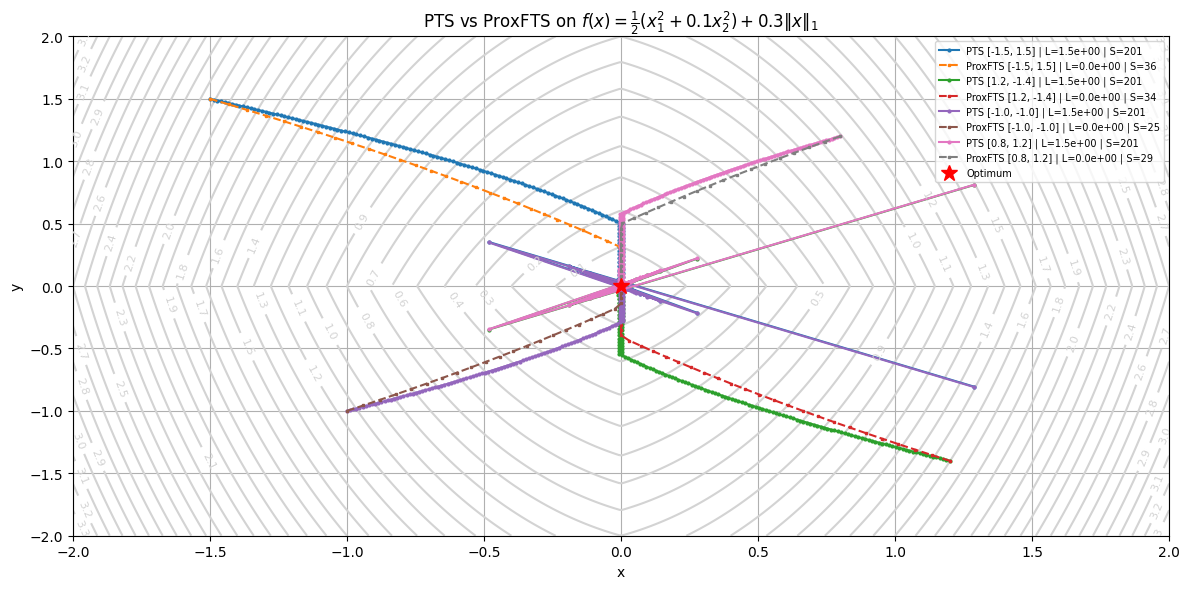

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Objective and gradient ---
def f(x):
    return 0.5 * (x[0]**2 + 0.1 * x[1]**2) + 0.3 * np.linalg.norm(x, ord=1)

def grad_f(x):
    grad = np.array([x[0], 0.1 * x[1]])
    subgrad_l1 = np.sign(x)
    return grad + 0.3 * subgrad_l1

# --- Proximal operator for L1 ---
def prox_l1(z, lam):
    return np.sign(z) * np.maximum(np.abs(z) - lam, 0.0)

# --- PTS update (no prox) ---
def pts_update(x, t, T, c1=0.2, gamma=0.5, eta=0.1):
    grad = grad_f(x)
    alpha = c1 / (T - t)
    return x - eta * alpha * np.power(np.abs(grad), gamma) * np.sign(grad)

# --- ProxFTS update ---
def proxfts_update(x, t, T, eta=0.1, c1=0.2, c2=0.05, gamma1=0.5, gamma2=1.5, lam=0.3):
    grad = grad_f(x)
    v = c1 * np.power(np.abs(grad), gamma1) * np.sign(grad) + \
        c2 * np.power(np.abs(grad), gamma2) * np.sign(grad)
    z = x - eta * v
    return prox_l1(z, eta * lam)

# --- Simulation runner ---
def run_method(method, x0, T=2.0, dt=0.01, tol=1e-5):
    x = x0.copy()
    t = 0
    traj = [x.copy()]
    while t < T:
        x = method(x, t, T)
        traj.append(x.copy())
        if f(x) < tol:
            break
        t += dt
    return np.array(traj), f(x), len(traj)

# --- Grid for contour plot ---
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 0.1 * Y**2) + 0.3 * (np.abs(X) + np.abs(Y))

# --- Starting points ---
starts = [
    np.array([-1.5, 1.5]),
    np.array([1.2, -1.4]),
    np.array([-1.0, -1.0]),
    np.array([0.8, 1.2]),
]

# --- Plotting ---
plt.figure(figsize=(12, 6))
cp = plt.contour(X, Y, Z, levels=40, colors='lightgray')
plt.clabel(cp, inline=True, fontsize=8)

# --- Run both methods for each start ---
for x0 in starts:
    # PTS (no proximal)
    traj_pts, loss_pts, steps_pts = run_method(pts_update, x0)
    plt.plot(traj_pts[:, 0], traj_pts[:, 1], 'o-', markersize=2, label=f'PTS {x0.tolist()} | L={loss_pts:.1e} | S={steps_pts}')

    # ProxFTS
    traj_pfts, loss_pfts, steps_pfts = run_method(proxfts_update, x0)
    plt.plot(traj_pfts[:, 0], traj_pfts[:, 1], 's--', markersize=2, label=f'ProxFTS {x0.tolist()} | L={loss_pfts:.1e} | S={steps_pfts}')

# --- Final touch ---
plt.plot(0, 0, 'r*', markersize=12, label='Optimum')
plt.title(r'PTS vs ProxFTS on $f(x) = \frac{1}{2}(x_1^2 + 0.1x_2^2) + 0.3\|x\|_1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.show()


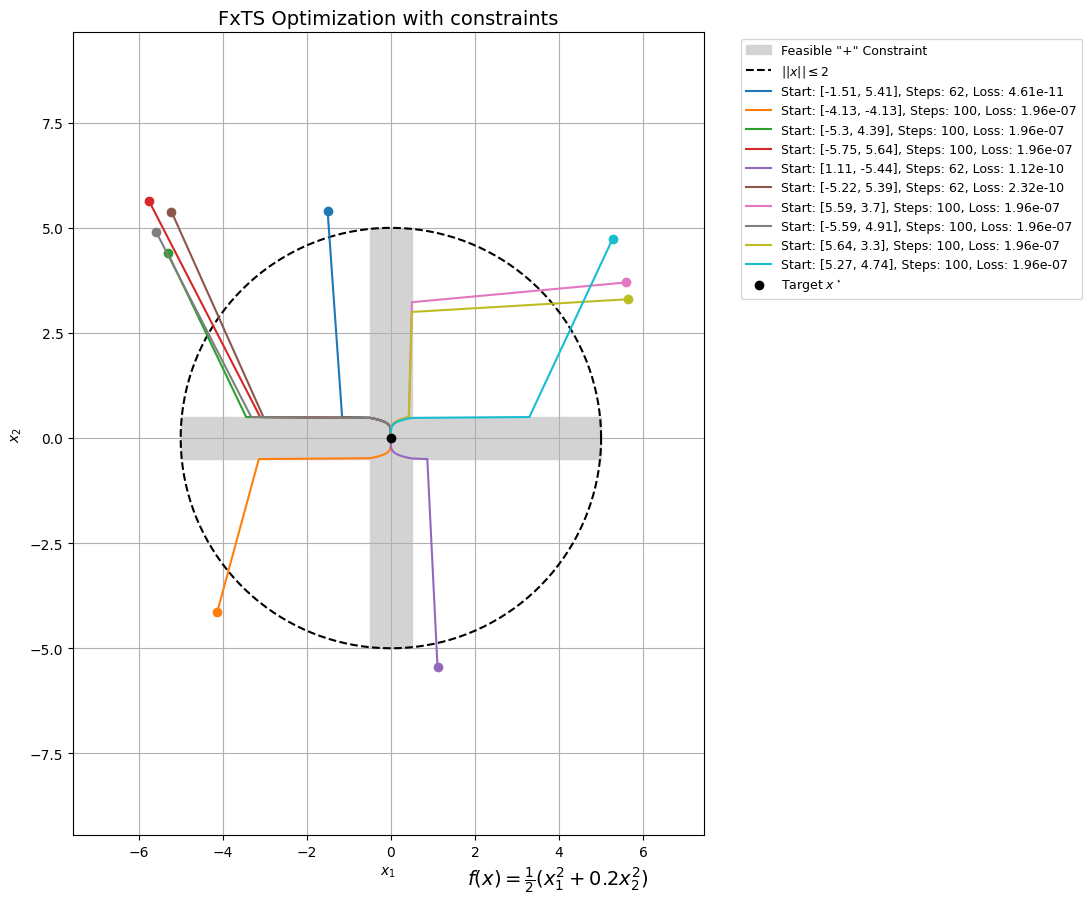

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function and gradient
def f(x):
    return 0.5 * (x[0]**2 + 0.2 * x[1]**2)

def grad_f(x):
    return np.array([x[0], 0.2 * x[1]])

# Project onto circle + "+"-shaped constraint
def project_to_plus_constraints(x, R=2.0, rail_x1=0.5, rail_x2=0.5):
    x_proj = x.copy()
    norm = np.linalg.norm(x_proj)
    if norm > R:
        x_proj = (R / norm) * x_proj

    if abs(x_proj[0]) > rail_x1 and abs(x_proj[1]) > rail_x2:
        if abs(x_proj[0]) < abs(x_proj[1]):
            x_proj[1] = np.clip(x_proj[1], -rail_x2, rail_x2)
        else:
            x_proj[0] = np.clip(x_proj[0], -rail_x1, rail_x1)
    else:
        x_proj[0] = np.clip(x_proj[0], -rail_x1, rail_x1) if abs(x_proj[0]) > rail_x1 else x_proj[0]
        x_proj[1] = np.clip(x_proj[1], -rail_x2, rail_x2) if abs(x_proj[1]) > rail_x2 else x_proj[1]

    return x_proj

# Fixed-Time Projected Gradient Descent with tolerance
def fixed_time_proj_gd(x0, eta1=0.1, eta2=0.05, p=1.5, q=0.5, max_steps=100,
                       tol=1e-5, R=2.0, rail_x1=0.5, rail_x2=0.5):
    x = x0.copy()
    traj = [x.copy()]
    for step in range(max_steps):
        g = grad_f(x)
        g_norm = np.linalg.norm(g)
        if g_norm < tol:
            break
        update = eta1 * g * g_norm**(p - 1) + eta2 * g * g_norm**(q - 1)
        x = project_to_plus_constraints(x - update, R, rail_x1, rail_x2)
        traj.append(x.copy())
    return np.array(traj), step + 1, f(x)

# Parameters
R = 5.0
rail_x1 = 0.5
rail_x2 = 0.5
max_steps = 100
tol = 1e-5

# Generate 10 start points far outside the circle
np.random.seed(42)
starts = []
while len(starts) < 10:
    x = np.random.uniform(-6, 6, size=2)
    if np.linalg.norm(x) > R + 0.5:  # ensure well outside
        starts.append(x)

colors = plt.cm.tab10(np.linspace(0, 1, 10))

# --- Plot ---
fig, ax = plt.subplots(figsize=(11, 9))

# "+" feasible region
ax.fill_betweenx([-R, R], -rail_x1, rail_x1, color='lightgray')
ax.fill_between([-R, R], -rail_x2, rail_x2, color='lightgray', label='Feasible "+" Constraint')

# Circle boundary
theta = np.linspace(0, 2 * np.pi, 300)
ax.plot(R * np.cos(theta), R * np.sin(theta), 'k--', label='$||x|| \\leq 2$')

# Plot trajectories with detailed legends
for i, (x0, c) in enumerate(zip(starts, colors)):
    traj, steps, loss = fixed_time_proj_gd(x0, max_steps=max_steps, tol=tol, R=R, rail_x1=rail_x1, rail_x2=rail_x2)
    start_label = np.round(x0, 2).tolist()
    label = f"Start: {start_label}, Steps: {steps}, Loss: {loss:.2e}"
    ax.plot(traj[:, 0], traj[:, 1], color=c, label=label)
    ax.plot(x0[0], x0[1], 'o', color=c)

# Target
ax.plot(0, 0, 'ko', label='Target $x^\\star$')

ax.set_title("FxTS Optimization with constraints", fontsize=14)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axis('equal')
ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()

# Function formula below plot
plt.figtext(0.5, 0.01, r"$f(x) = \frac{1}{2}(x_1^2 + 0.2x_2^2)$", ha='center', fontsize=14)

plt.show()


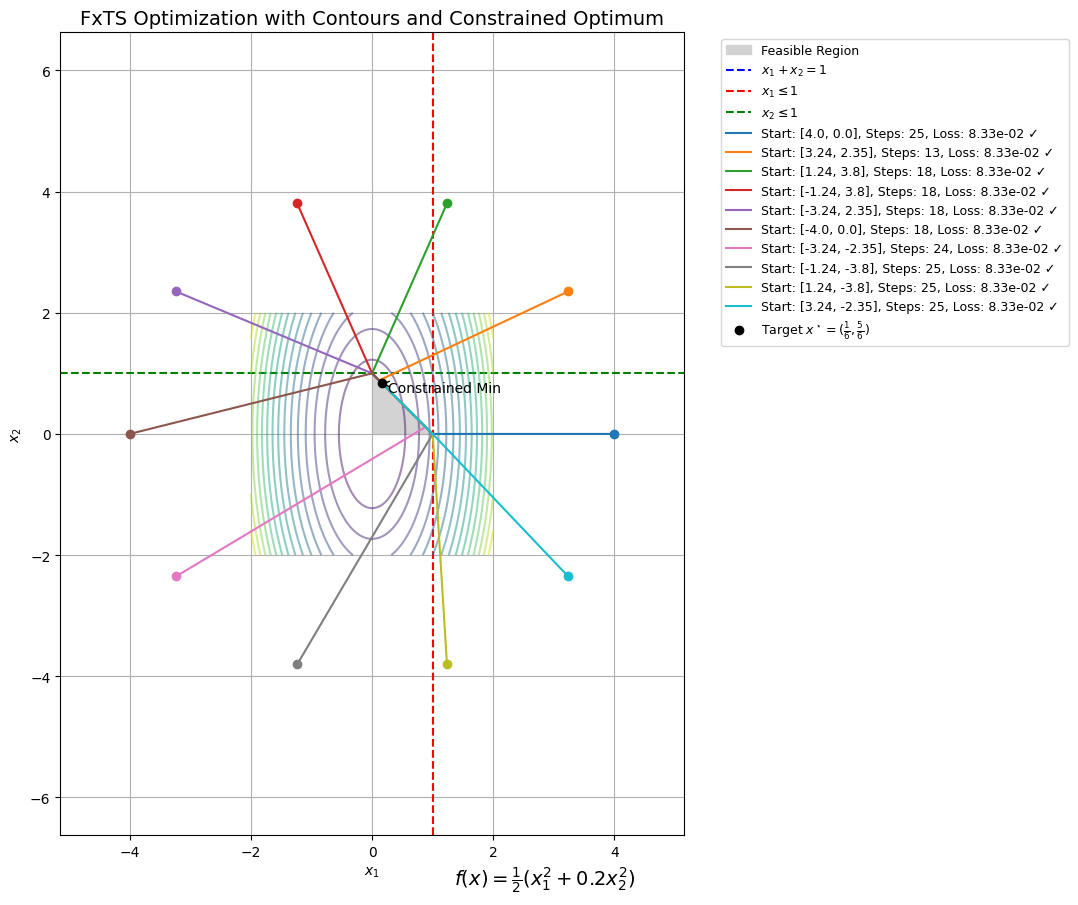

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function and gradient
def f(x):
    return 0.5 * (x[0]**2 + 0.2 * x[1]**2)

def grad_f(x):
    return np.array([x[0], 0.2 * x[1]])

# Projection onto feasible set: x1 + x2 = 1 and x1, x2 ≤ 1
def project_to_constraints(x):
    # Project onto line x1 + x2 = 1
    a = np.array([1.0, 1.0])
    b = 1.0
    x_proj = x - ((np.dot(a, x) - b) / np.dot(a, a)) * a

    # Enforce box constraints while staying on the line
    if x_proj[0] > 1.0:
        x_proj[0] = 1.0
        x_proj[1] = 0.0
    elif x_proj[1] > 1.0:
        x_proj[1] = 1.0
        x_proj[0] = 0.0

    return x_proj

# Fixed-Time Projected Gradient Descent (stop on f(x) near optimal)
def fixed_time_proj_gd(x0, eta1=0.3, eta2=0.1, p=1.5, q=0.5, max_steps=5000,
                       tol=1e-5, f_star=1/12):
    x = x0.copy()
    traj = [x.copy()]
    for step in range(max_steps):
        if abs(f(x) - f_star) < tol:
            break
        g = grad_f(x)
        update = eta1 * g * np.linalg.norm(g)**(p - 1) + eta2 * g * np.linalg.norm(g)**(q - 1)
        x = project_to_constraints(x - update)
        traj.append(x.copy())
    return np.array(traj), step + 1, f(x), abs(f(x) - f_star) < tol

# Generate evenly spaced start points outside feasible region
num_points = 10
radius_outer = 4.0
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
starts = [radius_outer * np.array([np.cos(t), np.sin(t)]) for t in angles]
colors = plt.cm.tab10(np.linspace(0, 1, num_points))

# Plot setup
fig, ax = plt.subplots(figsize=(11, 9))

# Feasible region: triangle bounded by x1 + x2 = 1, x1 ≤ 1, x2 ≤ 1
x_box = np.linspace(0, 1, 200)
y_box = 1 - x_box
ax.fill_between(x_box, 0, y_box, color='lightgray', label='Feasible Region')

# Constraint boundaries
ax.plot(x_box, y_box, 'b--', label=r'$x_1 + x_2 = 1$')
ax.axvline(1, color='r', linestyle='--', label=r'$x_1 \leq 1$')
ax.axhline(1, color='g', linestyle='--', label=r'$x_2 \leq 1$')

# Contour lines of f(x)
xgrid = np.linspace(-2, 2, 400)
ygrid = np.linspace(-2, 2, 400)

X, Y = np.meshgrid(xgrid, ygrid)
Z = 0.5 * (X**2 + 0.2 * Y**2)
ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.5)

# Optimization trajectories
f_star = 1 / 12  # exact constrained optimal loss
for i, (x0, c) in enumerate(zip(starts, colors)):
    traj, steps, loss, converged = fixed_time_proj_gd(x0, f_star=f_star)
    label = f"Start: {np.round(x0, 2).tolist()}, Steps: {steps}, Loss: {loss:.2e}" + (" ✓" if converged else " ✗")
    ax.plot(traj[:, 0], traj[:, 1], color=c, label=label)
    ax.plot(x0[0], x0[1], 'o', color=c)

# Constrained optimal point
x_star = np.array([1/6, 5/6])
ax.plot(*x_star, 'ko', label=r'Target $x^\star = (\frac{1}{6}, \frac{5}{6})$')
ax.annotate("Constrained Min", xy=x_star, xytext=(x_star[0]+0.1, x_star[1]-0.15),
            arrowprops=dict(arrowstyle="->"), fontsize=10)

# Formatting
ax.set_title("FxTS Optimization with Contours and Constrained Optimum", fontsize=14)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.grid(True)
ax.axis('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.figtext(0.5, 0.01, r"$f(x) = \frac{1}{2}(x_1^2 + 0.2x_2^2)$", ha='center', fontsize=14)
plt.show()


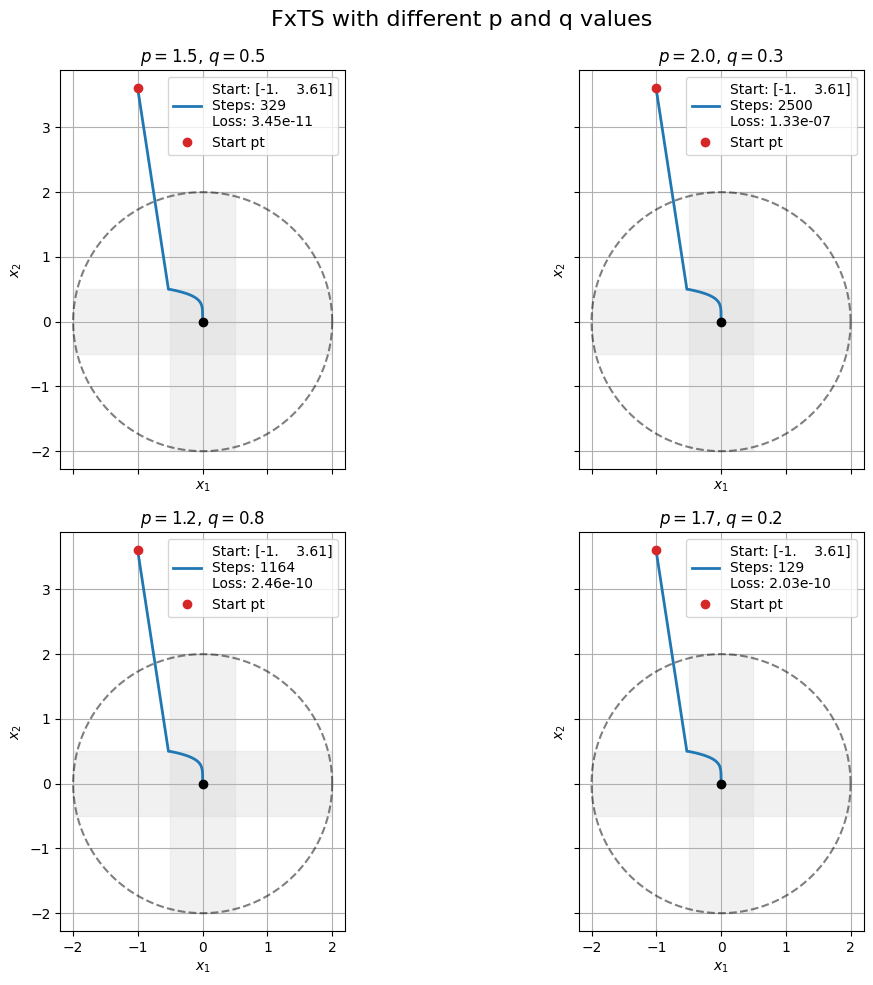

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Objective and gradient
def f(x):
    return 0.5 * (x[0]**2 + 0.2 * x[1]**2)

def grad_f(x):
    return np.array([x[0], 0.2 * x[1]])

# Projection for constraints (circular + plus)
def project_to_plus_constraints(x, R=2.0, rail_x1=0.5, rail_x2=0.5):
    x_proj = x.copy()
    norm = np.linalg.norm(x_proj)
    if norm > R:
        x_proj = (R / norm) * x_proj
    if abs(x_proj[0]) > rail_x1 and abs(x_proj[1]) > rail_x2:
        if abs(x_proj[0]) < abs(x_proj[1]):
            x_proj[1] = np.clip(x_proj[1], -rail_x2, rail_x2)
        else:
            x_proj[0] = np.clip(x_proj[0], -rail_x1, rail_x1)
    else:
        x_proj[0] = np.clip(x_proj[0], -rail_x1, rail_x1) if abs(x_proj[0]) > rail_x1 else x_proj[0]
        x_proj[1] = np.clip(x_proj[1], -rail_x2, rail_x2) if abs(x_proj[1]) > rail_x2 else x_proj[1]
    return x_proj

# Fixed-time Projected Gradient Descent
def fixed_time_proj_gd(x0, eta1, eta2, p, q, max_steps=5000, tol=1e-5, R=2.0, rail_x1=0.5, rail_x2=0.5):
    x = x0.copy()
    traj = [x.copy()]
    for step in range(max_steps):
        g = grad_f(x)
        g_norm = np.linalg.norm(g)
        if g_norm < tol:
            break
        update = eta1 * g * g_norm**(p - 1) + eta2 * g * g_norm**(q - 1)
        x = project_to_plus_constraints(x - update, R, rail_x1, rail_x2)
        traj.append(x.copy())
    return np.array(traj), step + 1, f(x)

# Parameters
eta1, eta2 = 0.01, 0.01
param_grid = [(1.5, 0.5), (2.0, 0.3), (1.2, 0.8), (1.7, 0.2)]
R, rail_x1, rail_x2 = 2.0, 0.5, 0.5
np.random.seed(42)
x0 = np.random.uniform(-4, 4, size=2)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axs = axs.flatten()

for idx, (p, q) in enumerate(param_grid):
    traj, steps, final_loss = fixed_time_proj_gd(
        x0, eta1, eta2, p, q, tol=1e-5, max_steps=2500, R=R, rail_x1=rail_x1, rail_x2=rail_x2
    )
    ax = axs[idx]
    ax.plot(traj[:, 0], traj[:, 1], lw=2, label=f"Start: {x0.round(2)}\nSteps: {steps}\nLoss: {final_loss:.2e}")
    ax.plot(x0[0], x0[1], 'o', label='Start pt', color='tab:red')
    ax.plot(0, 0, 'ko')  # Minimum
    ax.set_title(f"$p={p}$, $q={q}$")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_aspect('equal')
    theta = np.linspace(0, 2 * np.pi, 300)
    ax.plot(R * np.cos(theta), R * np.sin(theta), 'k--', alpha=0.5)
    ax.fill_betweenx([-R, R], -rail_x1, rail_x1, color='lightgray', alpha=0.3)
    ax.fill_between([-R, R], -rail_x2, rail_x2, color='lightgray', alpha=0.3)
    ax.grid(True)
    ax.legend()

fig.suptitle("FxTS with different p and q values", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



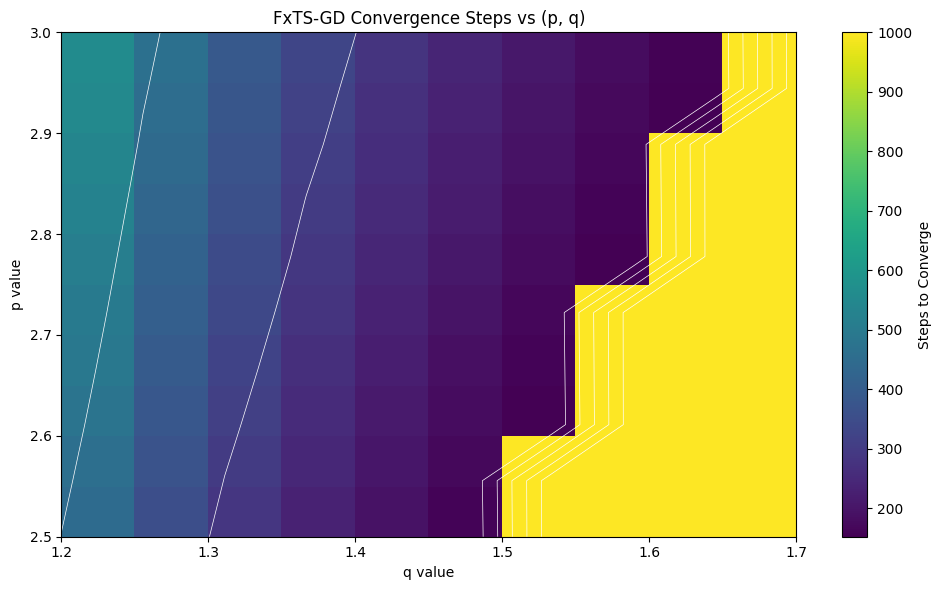

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Objective: Quadratic bowl ---
def f(x):
    return 0.5 * (x[0]**2 + 0.01 * x[1]**2)

def grad_f(x):
    return np.array([x[0], 0.01 * x[1]])

# --- Fixed parameters ---
eta_fx = 0.5
eps = 1e-6
max_iters = 1000
x0 = np.array([5.0, 5.0])

# --- Grid of (p, q) values ---
p_values = np.linspace(2.5, 3.0, 10)     # p > 1
q_values = np.linspace(1.2, 1.7, 10)   # q > 1
convergence_steps = np.zeros((len(p_values), len(q_values)))

# --- Grid search ---
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        x = x0.copy()
        steps = 0
        for _ in range(max_iters):
            f_val = f(x)
            if f_val <= eps:
                break
            scale = f_val ** (-(q - 1) / (p - 1))
            x = x - eta_fx * grad_f(x) * scale
            steps += 1
        convergence_steps[i, j] = steps

# --- Plotting heatmap ---
plt.figure(figsize=(10, 6))
plt.imshow(convergence_steps, origin='lower', cmap='viridis',
           extent=[q_values[0], q_values[-1], p_values[0], p_values[-1]],
           aspect='auto')
plt.colorbar(label="Steps to Converge")
plt.xlabel("q value")
plt.ylabel("p value")
plt.title("FxTS-GD Convergence Steps vs (p, q)")
plt.contour(q_values, p_values, convergence_steps, colors='white', linewidths=0.5)
plt.tight_layout()
plt.show()


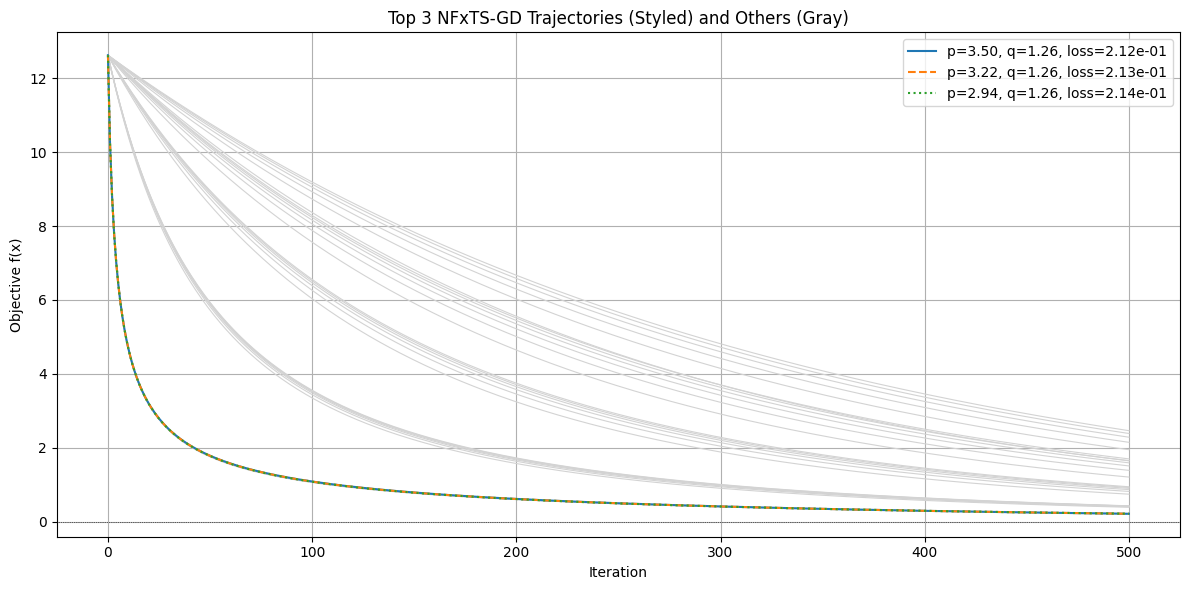

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective and derivatives
def f(x):
    return 0.5 * (x[0]**2 + 0.01 * x[1]**2)

def grad_f(x):
    return np.array([x[0], 0.02 * x[1]])

def hessian_f(x):
    return np.array([[1.0, 0.0], [0.0, 0.02]])

# Parameters
eta_nfx = 0.001
eps = 1e-6
max_iters = 500
x0 = np.array([5.0, 5.0])
safe_min = 1e-4
grad_max = 1e4  # explosion threshold

# Grid of (p, q) values
p_values = np.linspace(2.1, 3.5, 6)
q_values = np.linspace(1.1, 1.9, 6)

# Store all runs
results = []

for p in p_values:
    for q in q_values:
        x_nfx = x0.copy()
        f_vals_nfx = [f(x_nfx)]
        success = True
        for _ in range(max_iters):
            grad = grad_f(x_nfx)
            grad_norm = np.linalg.norm(grad)
            if f(x_nfx) <= eps or grad_norm < eps or grad_norm > grad_max:
                break
            hess_inv = np.linalg.inv(hessian_f(x_nfx))
            grad_norm = max(grad_norm, safe_min)
            term1 = grad / (grad_norm ** ((p - 2) / (p - 1)))
            term2 = grad / (grad_norm ** ((q - 2) / (q - 1)))
            update = hess_inv @ (term1 + term2)
            x_new = x_nfx - eta_nfx * update
            if f(x_new) > f_vals_nfx[-1]:
                success = False
                break
            x_nfx = x_new
            f_vals_nfx.append(f(x_nfx))
        results.append({
            'p': p,
            'q': q,
            'loss': f_vals_nfx[-1],
            'trajectory': f_vals_nfx,
            'success': success
        })

# Sort by final loss and pick top 3
top_results = sorted(results, key=lambda r: r['loss'])[:3]
line_styles = ['solid', 'dashed', 'dotted']

# Plotting all other runs in light gray
plt.figure(figsize=(12, 6))
for res in results:
    if res not in top_results:
        plt.plot(range(len(res['trajectory'])), res['trajectory'], color='lightgray', linewidth=0.8)

# Top 3 in color with different styles
for idx, res in enumerate(top_results):
    style = line_styles[idx % len(line_styles)]
    label = f"p={res['p']:.2f}, q={res['q']:.2f}, loss={res['loss']:.2e}"
    if not res['success']:
        label += " (stopped)"
    plt.plot(range(len(res['trajectory'])), res['trajectory'], label=label, linestyle=style)

plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.xlabel("Iteration")
plt.ylabel("Objective f(x)")
plt.title("Top 3 NFxTS-GD Trajectories (Styled) and Others (Gray)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Best p=3.220, q=1.260, final loss=8.79e-07


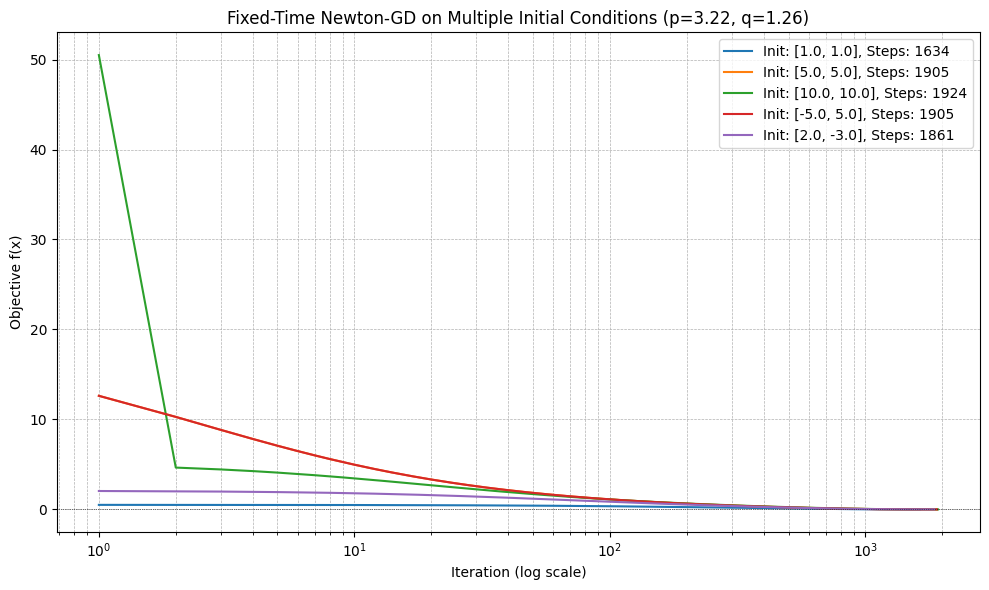

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective and derivatives
def f(x):
    return 0.5 * (x[0]**2 + 0.01 * x[1]**2)

def grad_f(x):
    return np.array([x[0], 0.01 * x[1]])

def hessian_f(x):
    return np.array([[1.0, 0.0], [0.0, 0.02]])

# Parameters
eta_nfx = 0.001
eps = 1e-6
max_iters = 2000
safe_min = 1e-4
grad_max = 1e4

# Grid to find best (p, q)
p_values = np.linspace(2.1, 3.5, 6)
q_values = np.linspace(1.1, 1.9, 6)

results = []

# Step 1: Find best (p, q)
for p in p_values:
    for q in q_values:
        x = np.array([5.0, 5.0])
        f_vals = [f(x)]
        success = True
        for _ in range(max_iters):
            grad = grad_f(x)
            grad_norm = np.linalg.norm(grad)
            if f(x) <= eps or grad_norm < eps or grad_norm > grad_max:
                break
            grad_norm = max(grad_norm, safe_min)
            hess_inv = np.linalg.inv(hessian_f(x))
            term1 = grad / (grad_norm ** ((p - 2) / (p - 1)))
            term2 = grad / (grad_norm ** ((q - 2) / (q - 1)))
            update = hess_inv @ (term1 + term2)
            x_new = x - eta_nfx * update
            if f(x_new) > f_vals[-1]:
                success = False
                break
            x = x_new
            f_vals.append(f(x))
        results.append({'p': p, 'q': q, 'loss': f_vals[-1], 'trajectory': f_vals, 'success': success})

# Get best result
best = sorted(results, key=lambda r: r['loss'])[0]
p_best, q_best = best['p'], best['q']
print(f"Best p={p_best:.3f}, q={q_best:.3f}, final loss={best['loss']:.2e}")

# Step 2: Test multiple initial conditions
initial_conditions = [
    np.array([1.0, 1.0]),
    np.array([5.0, 5.0]),
    np.array([10.0, 10.0]),
    np.array([-5.0, 5.0]),
    np.array([2.0, -3.0])
]

trajectories = []
for x0 in initial_conditions:
    x = x0.copy()
    f_vals = [f(x)]
    for _ in range(max_iters):
        grad = grad_f(x)
        grad_norm = np.linalg.norm(grad)
        if f(x) <= eps or grad_norm < eps or grad_norm > grad_max:
            break
        grad_norm = max(grad_norm, safe_min)
        hess_inv = np.linalg.inv(hessian_f(x))
        term1 = grad / (grad_norm ** ((p_best - 2) / (p_best - 1)))
        term2 = grad / (grad_norm ** ((q_best - 2) / (q_best - 1)))
        update = hess_inv @ (term1 + term2)
        x = x - eta_nfx * update
        f_vals.append(f(x))
    trajectories.append((x0, f_vals))

# Step 3: Plot (log x-axis)
plt.figure(figsize=(10, 6))
for x0, traj in trajectories:
    label = f"Init: [{x0[0]:.1f}, {x0[1]:.1f}], Steps: {len(traj)}"
    plt.plot(range(1, len(traj)+1), traj, label=label)  # start from 1 to avoid log(0)

plt.axhline(0, color='black', linestyle=':', linewidth=0.5)
plt.xscale("log")
plt.xlabel("Iteration (log scale)")
plt.ylabel("Objective f(x)")
plt.title(f"Fixed-Time Newton-GD on Multiple Initial Conditions (p={p_best:.2f}, q={q_best:.2f})")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


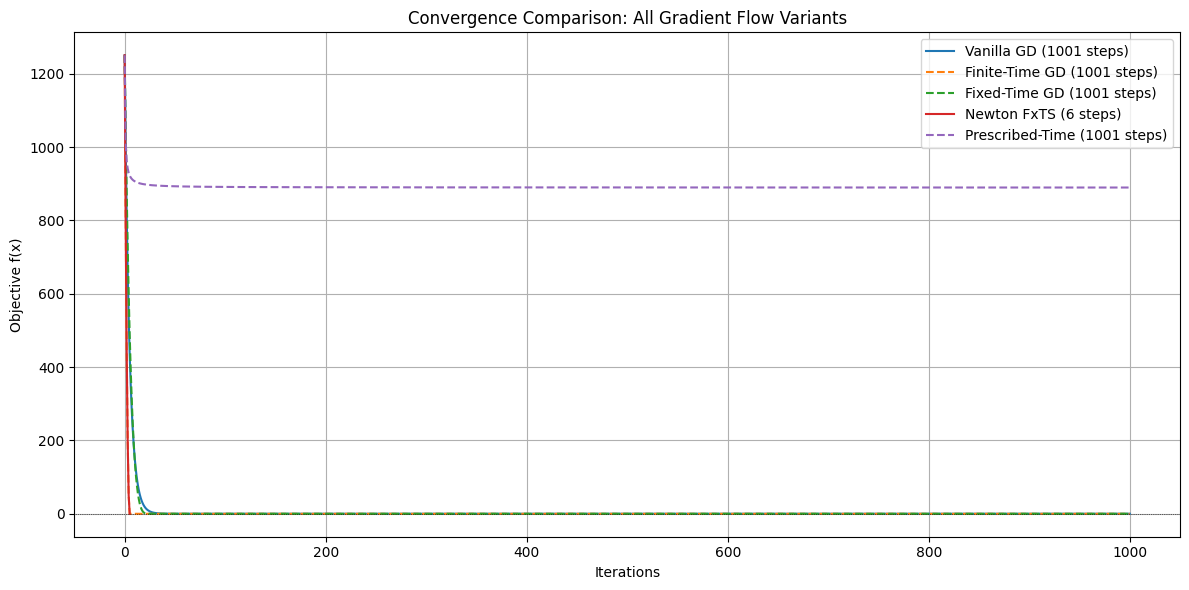

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (moderately stiff)
def f(x):
    return 0.5 * (100 * x[0]**2 + 0.01 * x[1]**2)

def grad_f(x):
    return np.array([100 * x[0], 0.02 * x[1]])

def hessian_f(x):
    return np.array([[100.0, 0.0], [0.0, 0.02]])

# Parameters
eta = 0.001
theta = 3 * eta
p, q = 2.5, 1.4
eps = 1e-6
max_iters = 1000
safe_min = 1e-10
grad_max = 1e5
x0 = np.array([5.0, 5.0])
max_step = 1.0

methods = {}

# --- Vanilla GD ---
x = x0.copy()
vals = [f(x)]
for _ in range(max_iters):
    if f(x) <= eps:
        break
    x -= eta * grad_f(x)
    vals.append(f(x))
methods["Vanilla GD"] = vals

# --- Finite-Time GD ---
x = x0.copy()
vals = [f(x)]
for _ in range(max_iters):
    fx = f(x)
    if fx <= eps:
        break
    grad = grad_f(x)
    norm = np.clip(np.linalg.norm(grad), safe_min, grad_max)
    scale = 1.0 / (norm ** ((q - 2) / (q - 1)))
    step = theta * grad * scale
    step = np.clip(step, -max_step, max_step)
    x -= step
    vals.append(f(x))
methods["Finite-Time GD"] = vals

# --- Fixed-Time GD ---
x = x0.copy()
vals = [f(x)]
for _ in range(max_iters):
    fx = f(x)
    if fx <= eps:
        break
    grad = grad_f(x)
    norm = np.clip(np.linalg.norm(grad), safe_min, grad_max)
    fx = np.clip(fx, safe_min, grad_max)
    s1 = norm ** (-(p - 2) / (p - 1))
    s2 = fx ** (-(q - 1) / (p - 1))
    scale = s1 + s2
    step = theta * grad * scale
    step = np.clip(step, -max_step, max_step)
    x -= step
    vals.append(f(x))
methods["Fixed-Time GD"] = vals

# --- Newton-based FxTS ---
x = x0.copy()
vals = [f(x)]
for _ in range(max_iters):
    fx = f(x)
    grad = grad_f(x)
    norm = np.clip(np.linalg.norm(grad), safe_min, grad_max)
    if fx <= eps:
        break
    hess_inv = np.linalg.inv(hessian_f(x))
    term1 = grad / (norm ** ((p - 2) / (p - 1)))
    term2 = grad / (norm ** ((q - 2) / (q - 1)))
    update = hess_inv @ (term1 + term2)
    step = theta * update
    step = np.clip(step, -max_step, max_step)
    x -= step
    vals.append(f(x))
methods["Newton FxTS"] = vals

# --- Prescribed-Time-Inspired ---
x = x0.copy()
vals = [f(x)]
for t in range(1, max_iters + 1):
    if f(x) <= eps:
        break
    decay = 1 / (t**2)
    step = eta * grad_f(x) * decay
    step = np.clip(step, -max_step, max_step)
    x -= step
    vals.append(f(x))
methods["Prescribed-Time"] = vals

# --- Plotting ---
plt.figure(figsize=(12, 6))
for name, vals in methods.items():
    plt.plot(vals, label=f"{name} ({len(vals)} steps)", linestyle="--" if "Time" in name else "-")
plt.axhline(0, color='black', linestyle=':', linewidth=0.5)
plt.xlabel("Iterations")
plt.ylabel("Objective f(x)")
plt.title("Convergence Comparison: All Gradient Flow Variants")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Finite time stability


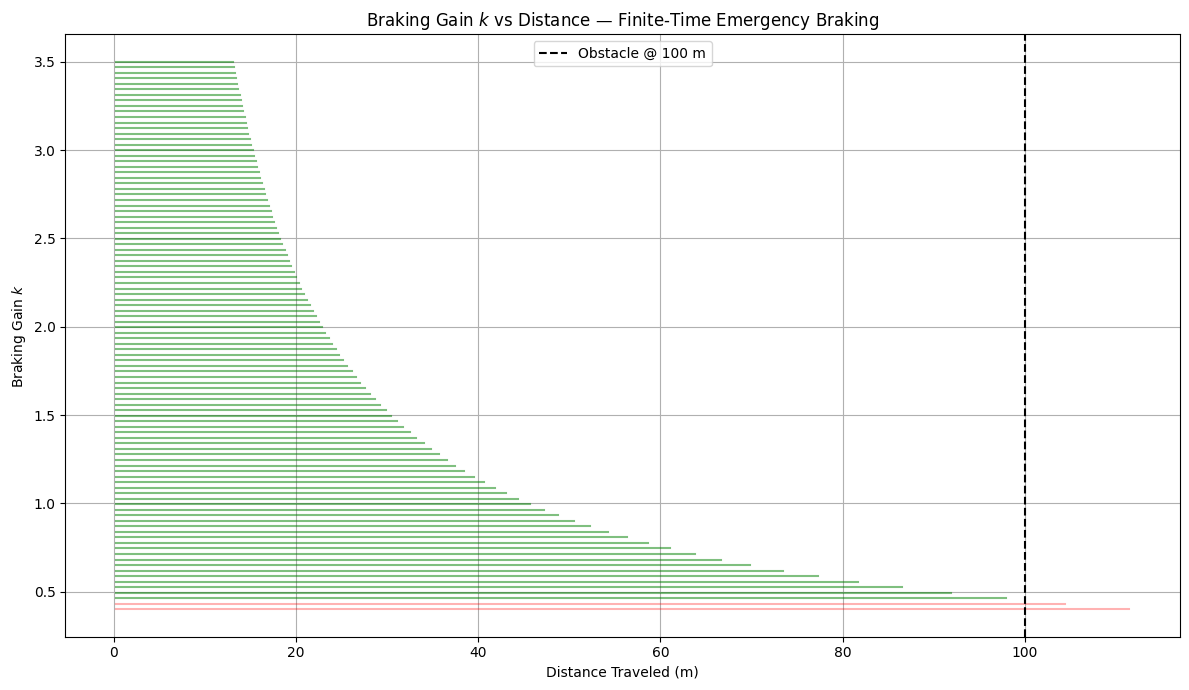

✔️ Minimum safe braking gain to stop before obstacle: k ≈ 0.463


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
v0 = 16.67  # Initial speed in m/s (60 km/h)
alpha = 0.5  # Nonlinearity in braking
D_obstacle = 100  # Obstacle at 100 meters

# k range
k_values = np.linspace(0.4, 3.5, 100)  # braking gains
t = np.linspace(0, 15, 1000)  # simulate 15 seconds
dt = t[1] - t[0]

# Set up plot
plt.figure(figsize=(12, 7))

# Track critical values
k_safe = []

for k in k_values:
    # Compute v(t)
    v_alpha = np.maximum(v0**(1 - alpha) - k * (1 - alpha) * t, 0)
    v_t = v_alpha**(1 / (1 - alpha))

    # Integrate to get distance
    x_t = np.cumsum(v_t) * dt
    x_final = x_t[-1]

    if x_final <= D_obstacle:
        plt.plot(x_t, [k]*len(x_t), color='green', alpha=0.5)
        k_safe.append(k)
    else:
        plt.plot(x_t, [k]*len(x_t), color='red', alpha=0.3)

# Obstacle line
plt.axvline(x=D_obstacle, color='black', linestyle='--', label='Obstacle @ 100 m')

# Labels and styling
plt.xlabel('Distance Traveled (m)')
plt.ylabel('Braking Gain $k$')
plt.title('Braking Gain $k$ vs Distance — Finite-Time Emergency Braking')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Report safe range
print(f"Minimum safe braking gain to stop before obstacle: k ≈ {min(k_safe):.3f}")


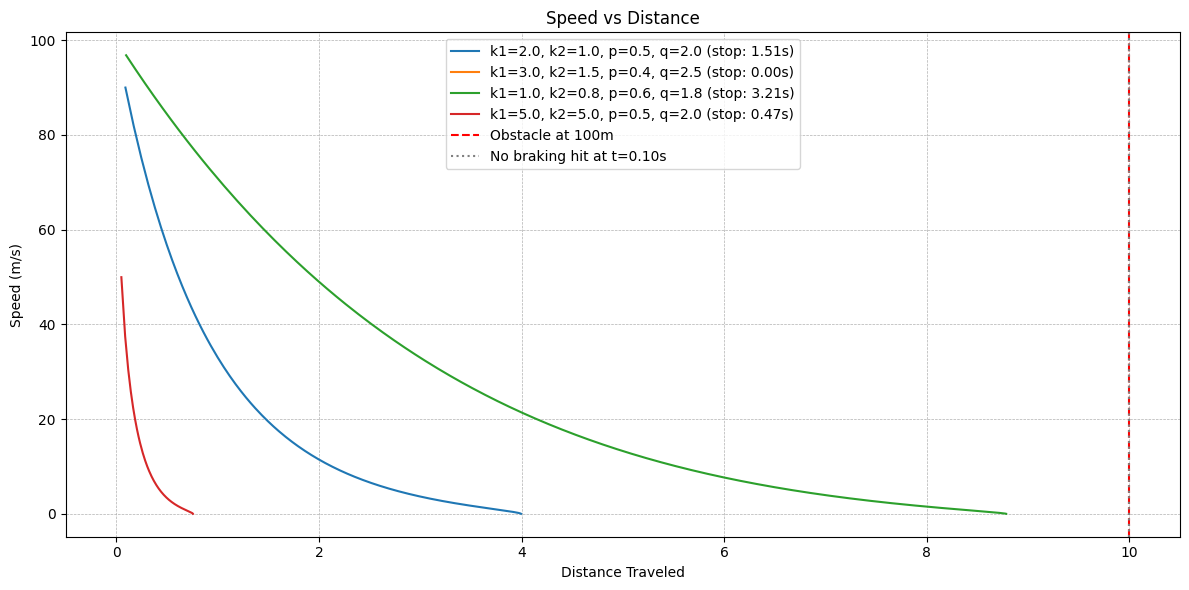

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time settings
v0 = 100  # Initial speed in m/s (100 km/h)
t_max = 5.0  # Maximum simulation time in seconds
dt = 0.001  # Time step
t = np.arange(0, t_max, dt)
D_obstacle = 10  # meters
T_collision = D_obstacle / v0  # Time to collision without braking

# Parameter sets for (k1, k2, p, q)
param_sets = [
    {"k1": 2.0, "k2": 1.0, "p": 0.5, "q": 2.0},
    {"k1": 3.0, "k2": 1.5, "p": 0.4, "q": 2.5},
    {"k1": 1.0, "k2": 0.8, "p": 0.6, "q": 1.8},
    {"k1": 5.0, "k2": 5.0, "p": 0.5, "q": 2.0}
]

# Plot setup
plt.figure(figsize=(12, 6))

# Simulate each parameter set
for params in param_sets:
    v = v0
    x = 0
    v_hist, x_hist = [], []
    stop_time = 0.0

    for ti in t:
        if v <= 0:
            stop_time = ti
            break
        a = -params["k1"] * v**params["p"] - params["k2"] * v**params["q"]
        v += a * dt
        v = max(v, 0)
        x += v * dt
        v_hist.append(v)
        x_hist.append(x)

    label = f"k1={params['k1']}, k2={params['k2']}, p={params['p']}, q={params['q']} (stop: {stop_time:.2f}s)"
    plt.plot(x_hist, v_hist, label=label)

# Obstacle markers
plt.axvline(D_obstacle, color='red', linestyle='--', label='Obstacle at 100m')
plt.axvline(v0 * T_collision, color='gray', linestyle=':', label=f'No braking hit at t={T_collision:.2f}s')

# Log scale on X-axis
# plt.xscale('log')
plt.xlabel("Distance Traveled")
plt.ylabel("Speed (m/s)")
plt.title("Speed vs Distance")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


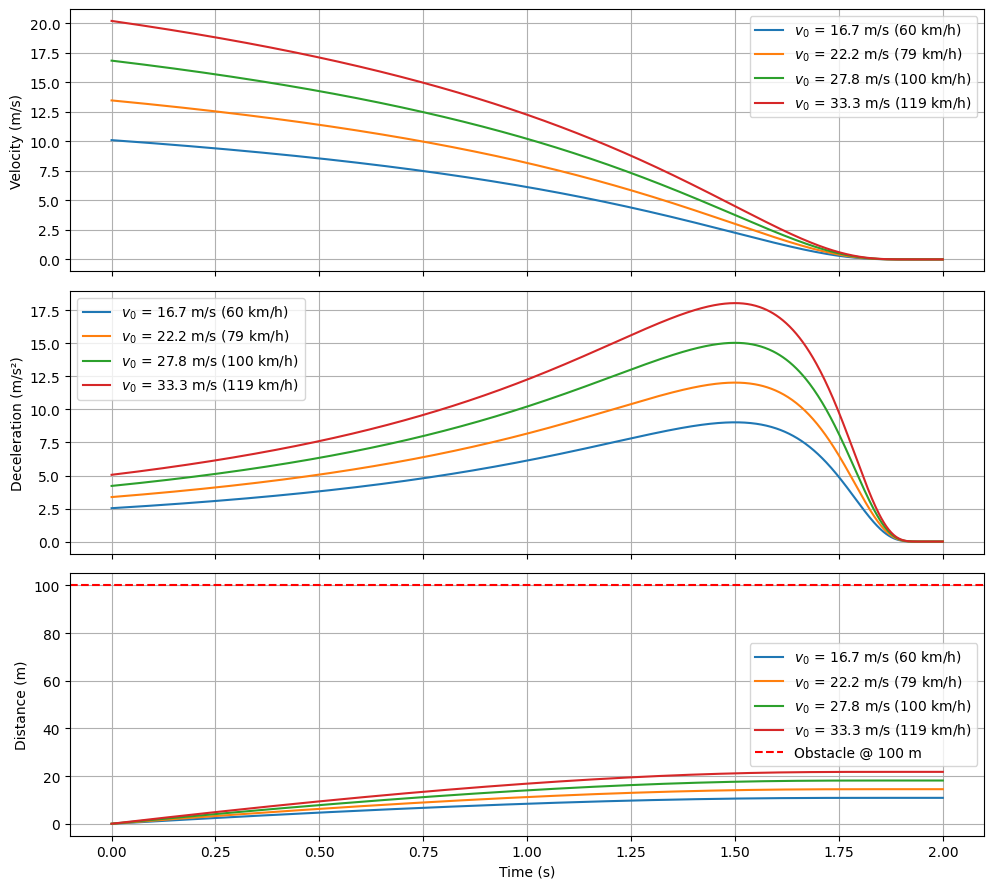

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_speeds = [16.67, 22.22, 27.78, 33.33]
T = 2.0
r = 1.0
gamma = 2.0      # Must be >1

# Time vector (avoid hitting T exactly)
t = np.linspace(0, T - 1e-4, 1000)
dt = t[1] - t[0]
tau = np.clip(T - t, 1e-6, T)

# Setup plots
fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

for v0 in initial_speeds:
    # Prescribed-time velocity
    v_t = v0 * np.exp(-r * tau**(1 - gamma))

    # Acceleration
    a_t = r * (1 - gamma) * tau**(-gamma) * v_t

    # Distance
    x_t = np.cumsum(v_t) * dt

    # Append final value for smooth plot
    t_ext = np.append(t, T)
    v_ext = np.append(v_t, 0)
    a_ext = np.append(a_t, 0)
    x_ext = np.append(x_t, x_t[-1])

    label = f"$v_0$ = {v0:.1f} m/s ({int(v0 * 3.6)} km/h)"

    axs[0].plot(t_ext, v_ext, label=label)
    axs[1].plot(t_ext, -a_ext, label=label)
    axs[2].plot(t_ext, x_ext, label=label)

# Plot settings
axs[0].set_ylabel("Velocity (m/s)")
axs[0].legend()
axs[0].grid(True)

axs[1].set_ylabel("Deceleration (m/s²)")
axs[1].legend()
axs[1].grid(True)

axs[2].set_ylabel("Distance (m)")
axs[2].set_xlabel("Time (s)")
axs[2].axhline(100, linestyle='--', color='red', label='Obstacle @ 100 m')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


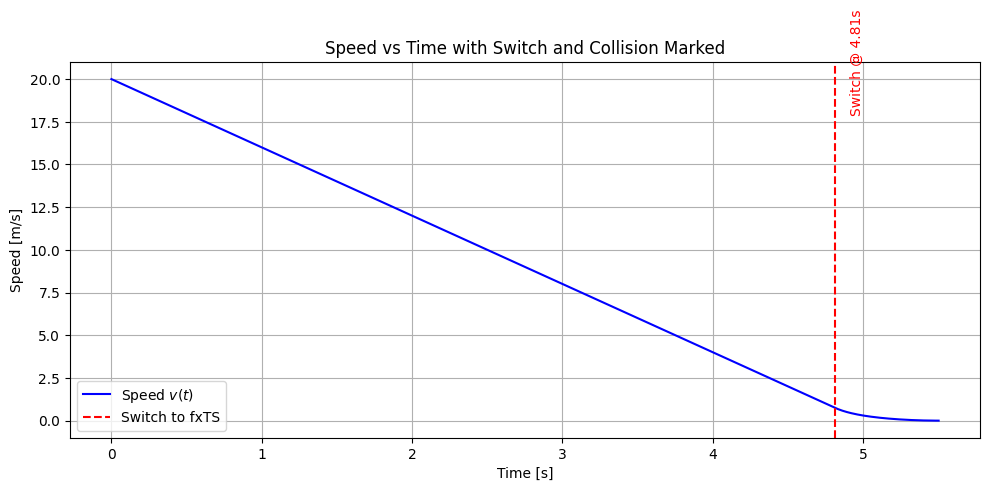

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

# Parameters
v0 = 20.0
amax = 4.0
k1 = 2.0
k2 = 4.0
alpha = 0.5
beta = 2.0
x_obstacle = 100.0

# --- Threshold velocity ---
def threshold_eq(v):
    return k1 * v**alpha + k2 * v**beta - amax

sol_thresh = root_scalar(threshold_eq, bracket=[1e-3, v0], method='bisect')
v_thresh = sol_thresh.root
t_switch = (v0 - v_thresh) / amax

# --- Phase 1: linear
dt = 0.01
t_phase1 = np.arange(0, t_switch, dt)
v_phase1 = v0 - amax * t_phase1
x_phase1 = v0 * t_phase1 - 0.5 * amax * t_phase1**2

# --- Phase 2: nonlinear fxTS
def fxTS(t, y):
    v = max(y[0], 1e-6)
    return [-k1 * v**alpha - k2 * v**beta, y[0]]  # dy = [dv/dt, dx/dt]

# Event: vehicle stops
def stop_event(t, y):
    return y[0]
stop_event.terminal = True
stop_event.direction = -1

# Event: collision with obstacle
def collision_event(t, y):
    return y[1] - x_obstacle
collision_event.terminal = True
collision_event.direction = 1

# Integrate from v_thresh, x = x1_end
y0 = [v_thresh, x_phase1[-1]]
t_span = [t_switch, t_switch + 30]  # generous upper limit
t_eval = np.arange(t_switch, t_span[1], dt)

sol = solve_ivp(
    fxTS, t_span, y0, t_eval=t_eval,
    events=[stop_event, collision_event],
    rtol=1e-6, atol=1e-8
)

t_phase2 = sol.t
v_phase2 = sol.y[0]
x_phase2 = sol.y[1]

# Combine
t_comb = np.concatenate((t_phase1, t_phase2))
v_comb = np.concatenate((v_phase1, v_phase2))
x_comb = np.concatenate((x_phase1, x_phase2))

# Check which event occurred
t_coll = None
if sol.t_events[1].size > 0:
    t_coll = sol.t_events[1][0]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t_comb, v_comb, label='Speed $v(t)$', color='blue')

# Mark switch to fxTS
plt.axvline(t_switch, color='red', linestyle='--', label='Switch to fxTS')
plt.text(t_switch + 0.1, max(v_comb) * 0.9, f'Switch @ {t_switch:.2f}s', rotation=90, color='red')

# Mark collision if occurred
if t_coll:
    plt.axvline(t_coll, color='black', linestyle='--', label='Collision')
    plt.text(t_coll + 0.1, max(v_comb) * 0.7, f'Collision @ {t_coll:.2f}s', rotation=90, color='black')

plt.xlabel('Time [s]')
plt.ylabel('Speed [m/s]')
plt.title('Speed vs Time with Switch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


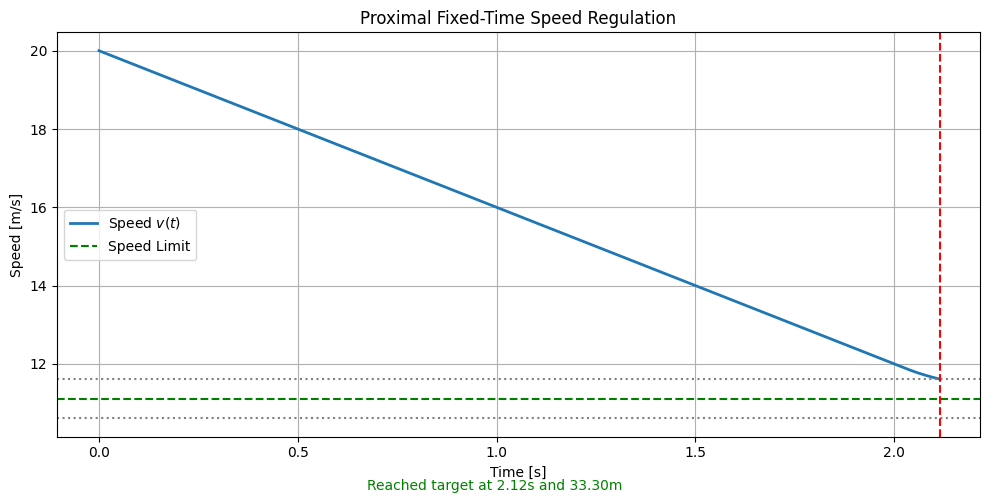

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
v0 = 20.0                     # initial speed [m/s] (> 40 mph)
v_limit = 11.11               # speed limit [m/s] = 40 km/h
delta = 0.5                   # tolerance [m/s]
amax = 4.0                    # maximum deceleration [m/s^2]

# FxTS control parameters
k1 = 2.0
k2 = 4.0
alpha = 0.5
beta = 2.0

# Time range for simulation
t_max = 20.0
dt = 0.01
t_eval = np.arange(0, t_max, dt)

# Define the dynamics
def dynamics(t, y):
    v, x = y
    e = v - v_limit
    if abs(e) < 1e-4:
        e = 0  # to prevent numerical instability

    if e == 0:
        u_raw = 0
    else:
        u_raw = -k1 * np.sign(e) * abs(e)**alpha - k2 * np.sign(e) * abs(e)**beta

    u = max(-amax, u_raw)
    return [u, v]

# Event: speed enters tolerance band
def speed_reached(t, y):
    return abs(y[0] - v_limit) - delta
speed_reached.terminal = True
speed_reached.direction = -1

# Event: position exceeds 100 m
def overshoot(t, y):
    return y[1] - 100
overshoot.terminal = True
overshoot.direction = 1

# Initial condition
y0 = [v0, 0.0]

# Solve the system
sol = solve_ivp(
    dynamics,
    [0, t_max],
    y0,
    t_eval=t_eval,
    events=[speed_reached, overshoot],
    rtol=1e-8,
    atol=1e-10
)

# Extract results
t = sol.t
v = sol.y[0]
x = sol.y[1]

# Determine outcome
if sol.t_events[0].size > 0:
    t_hit = sol.t_events[0][0]
    x_hit = np.interp(t_hit, t, x)
    outcome_text = f"Reached target at {t_hit:.2f}s and {x_hit:.2f}m"
    outcome_color = 'green'
else:
    t_hit = None
    outcome_text = f"Speed limit not achieved within 100 m. Final position: {x[-1]:.2f} m"
    outcome_color = 'red'

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, v, label='Speed $v(t)$', linewidth=2)
plt.axhline(v_limit, color='green', linestyle='--', label='Speed Limit')
plt.axhline(v_limit + delta, color='gray', linestyle=':')
plt.axhline(v_limit - delta, color='gray', linestyle=':')
plt.xlabel('Time [s]')
plt.ylabel('Speed [m/s]')
plt.title('Proximal Fixed-Time Speed Regulation')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mark hit time
if t_hit:
    plt.axvline(t_hit, color='red', linestyle='--')

# Caption at the bottom
plt.figtext(0.5, 0.01, outcome_text, ha='center', fontsize=10, color=outcome_color)

# Show plot
plt.show()


FTS converged in 623 steps, final loss=1.37e-05
FxTS converged in 377 steps, final loss=1.31e-05
PTS (T=4s) converged in 399 steps, final loss=4.70e-02
PFTS converged in 267 steps, final loss=1.74e-05
ProxFTS converged in 159 steps, final loss=6.25e-04


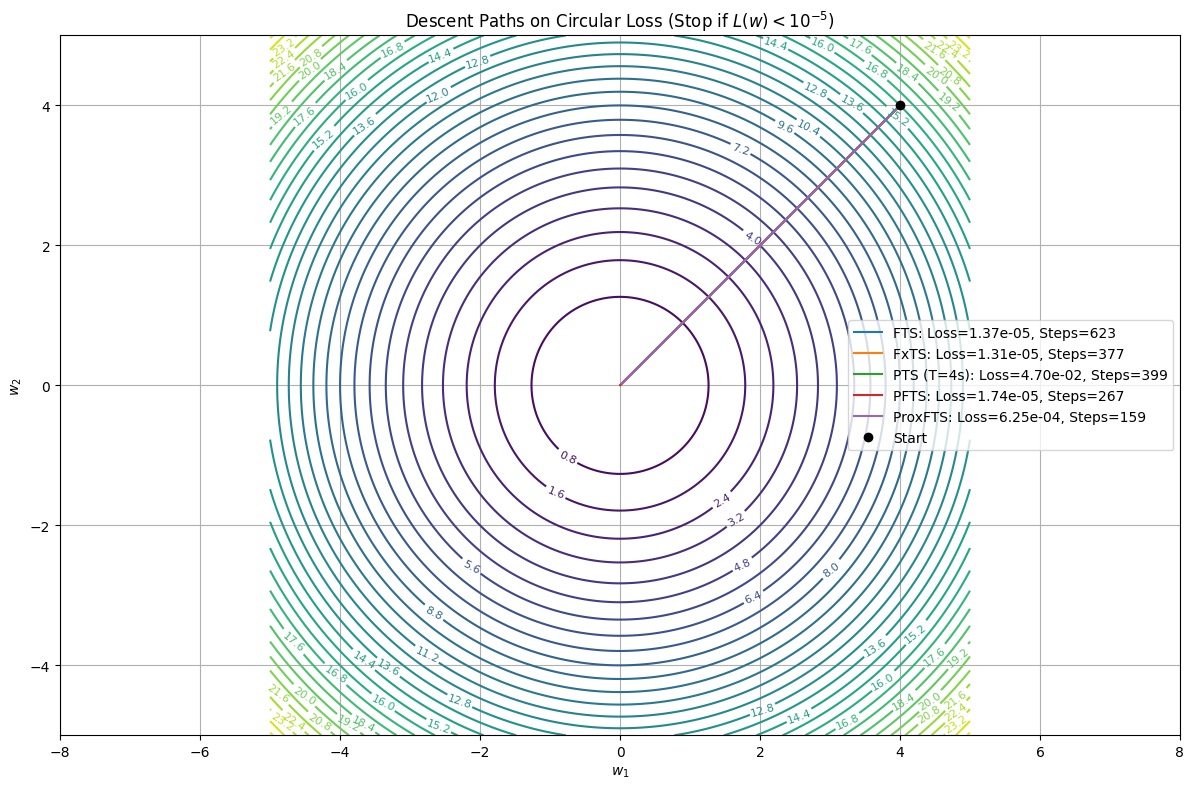

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Loss and gradient (circular)
def loss(w):
    return 0.5 * (w[0]**2 + w[1]**2)

def grad(w):
    return w

# Gradient clipping
def clip_grad(g, max_norm):
    norm = np.linalg.norm(g)
    return g if norm <= max_norm else (g / norm) * max_norm

# Step functions with method-specific parameters
def step_fts(w, eta, k, alpha):
    g = grad(w)
    u = k * np.sign(g) * np.abs(g)**alpha
    u = clip_grad(u, umax)
    return w - eta * u

def step_fxts(w, eta, k1, k2, alpha, beta):
    g = grad(w)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    u = clip_grad(u, umax)
    return w - eta * u

def step_pts(w, t, eta, T):
    g = grad(w)
    g = clip_grad(g, umax)
    return w - eta * g / max(T - t, 1e-3)

def step_pfts(w, eta, k1, k2, alpha, beta):
    g = grad(w)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    return w - eta * np.clip(u, -umax, umax)

def step_proxfts(w, eta, k1, k2, alpha, beta):
    g = grad(w)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    return w - eta * np.clip(u, -umax, umax)

# Parameters
w0 = np.array([4.0, 4.0])
umax = 1.0
tolerance = 1e-5
max_steps = 1000

# Method-specific parameters
params = {
    "FTS": {"k": 1.0, "alpha": 0.5, "eta": 0.01},
    "FxTS": {"k1": 5.0, "k2": 6.0, "alpha": 0.5, "beta": 1.5, "eta": 0.015},
    "PTS": {"T": 4.0, "eta": 0.01},
    "PFTS": {"k1": 5.0, "k2": 6.0, "alpha": 0.5, "beta": 1.5, "eta": 0.015},
    "ProxFTS": {"k1": 30.0, "k2": 35.0, "alpha": 0.5, "beta": 1.5, "eta": 0.025}
}

# Methods dictionary
methods = {
    "FTS": {
        "step_fn": lambda w, t: step_fts(w, params["FTS"]["eta"], params["FTS"]["k"], params["FTS"]["alpha"]),
        "color": "tab:blue"
    },
    "FxTS": {
        "step_fn": lambda w, t: step_fxts(w, params["FxTS"]["eta"], params["FxTS"]["k1"], params["FxTS"]["k2"], params["FxTS"]["alpha"], params["FxTS"]["beta"]),
        "color": "tab:orange"
    },
    "PTS (T=4s)": {
        "step_fn": lambda w, t: step_pts(w, t, params["PTS"]["eta"], params["PTS"]["T"]),
        "color": "tab:green"
    },
    "PFTS": {
        "step_fn": lambda w, t: step_pfts(w, params["PFTS"]["eta"], params["PFTS"]["k1"], params["PFTS"]["k2"], params["PFTS"]["alpha"], params["PFTS"]["beta"]),
        "color": "tab:red"
    },
    "ProxFTS": {
        "step_fn": lambda w, t: step_proxfts(w, params["ProxFTS"]["eta"], params["ProxFTS"]["k1"], params["ProxFTS"]["k2"], params["ProxFTS"]["alpha"], params["ProxFTS"]["beta"]),
        "color": "tab:purple"
    }
}

# Run each method with early stopping on tolerance
results = {}
for name, info in methods.items():
    w = w0.copy()
    path = [w.copy()]
    eta_method = params.get(name.split()[0], params.get(name.split("(")[0], {})).get("eta", 0.01)
    for i in range(max_steps):
        t = i * eta_method
        w_new = info["step_fn"](w, t)
        l = loss(w_new)
        if l < tolerance:
            break
        w = w_new
        path.append(w.copy())
    steps = len(path) - 1
    results[name] = {
        "path": np.array(path),
        "steps": steps,
        "time": steps * eta_method,
        "final_loss": loss(path[-1]),
        "color": info["color"]
    }

# Print results for verification
for name, res in results.items():
    print(f"{name} converged in {res['steps']} steps, final loss={res['final_loss']:.2e}")

# Plot contours and paths without time in legend
w1_vals = np.linspace(-5, 5, 300)
w2_vals = np.linspace(-5, 5, 300)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = 0.5 * (W1**2 + W2**2)

plt.figure(figsize=(12, 8))
cs = plt.contour(W1, W2, Z, levels=40, cmap="viridis")
plt.clabel(cs, inline=True, fontsize=8)

for name, res in results.items():
    label = f"{name}: Loss={res['final_loss']:.2e}, Steps={res['steps']}"
    plt.plot(res["path"][:, 0], res["path"][:, 1], label=label, color=res["color"])

plt.plot(*w0, 'ko', label='Start')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title("Descent Paths on Circular Loss (Stop if $L(w) < 10^{-5}$)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
for k,v in results.items():
    print(k, v['steps'], v['final_loss'])

FTS 624 9.574042288472337e-06
FxTS 572 3.4717849954048617e-06
PTS (T=4s) 400 2.1742978700154138e-29
PFTS 410 3.142316274865824e-06
ProxFTS 410 3.142316274865824e-06


FTS converged in 624 steps, final loss=9.57e-06
FxTS converged in 257 steps, final loss=4.07e-06
PTS (T=4s) converged in 400 steps, final loss=2.15e-29
PFTS converged in 268 steps, final loss=4.83e-07
ProxFTS converged in 67 steps, final loss=4.84e-06


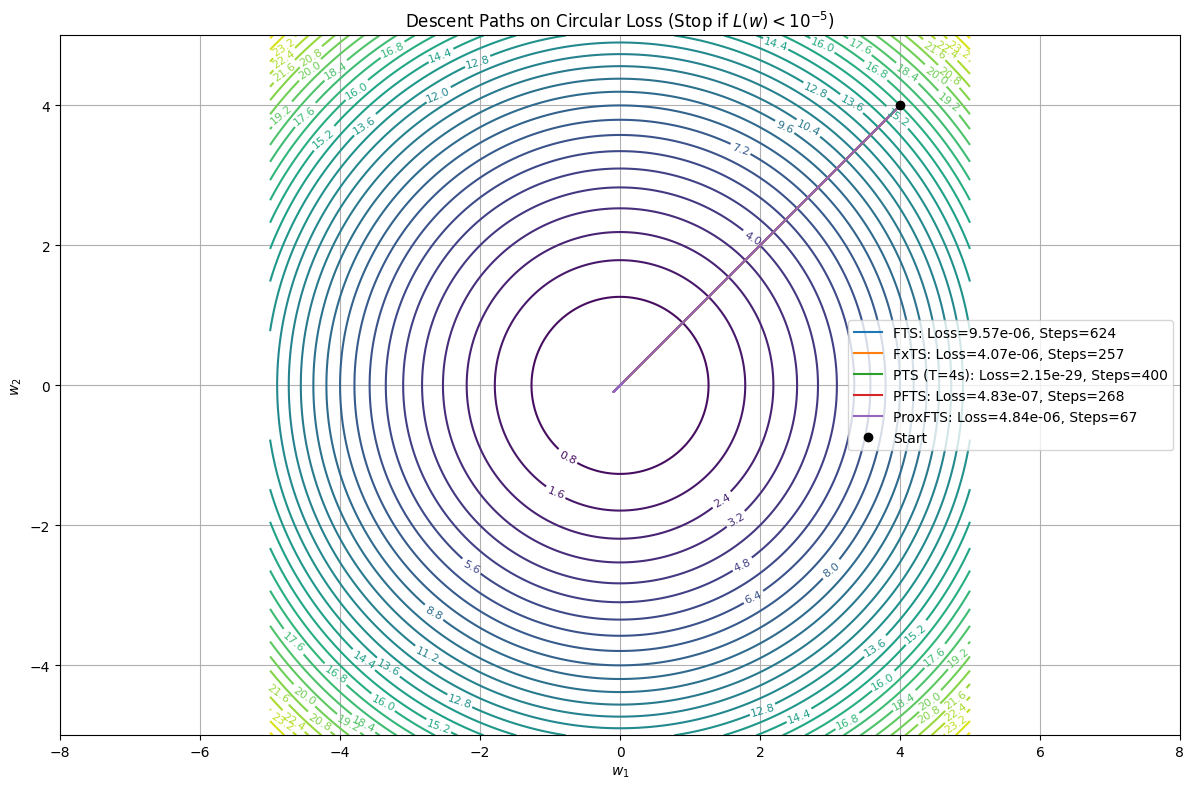

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Loss and gradient (circular) ----
def loss(w):
    return 0.5 * (w[0]**2 + w[1]**2)

def grad(w):
    return w

# ---- Gradient clipping ----
def clip_grad(g, max_norm):
    norm = np.linalg.norm(g)
    return g if norm <= max_norm else (g / norm) * max_norm

# ---- Step functions ----
def step_fts(w, eta, k, alpha):
    g = grad(w)
    u = k * np.sign(g) * np.abs(g)**alpha
    u = clip_grad(u, umax)
    return w - eta * u

def step_fxts(w, eta, k1, k2, alpha, beta):
    g = grad(w)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    u = clip_grad(u, umax)
    return w - eta * u

def step_pts(w, t, eta, T):
    g = grad(w)
    g = clip_grad(g, umax)
    scale = 1.0 / max(T - t, 1e-3)
    return w - eta * scale * g


def step_pfts(w, eta, k1, k2, alpha, beta):
    g = grad(w)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    return w - eta * np.clip(u, -umax, umax)

def step_proxfts(w, eta, k1, k2, alpha, beta, step, target_steps=100):
    g = grad(w)
    scale = max((target_steps - step) / target_steps, 0.05)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    return w - eta * scale * np.clip(u, -umax, umax)

# ---- Parameters ----
w0 = np.array([4.0, 4.0])
tolerance = 1e-5
max_steps = 1000
umax = 1.0

params = {
    "FTS": {"k": 1.0, "alpha": 0.5, "eta": 0.01},
    "FxTS": {"k1": 6.0, "k2": 7.0, "alpha": 0.5, "beta": 1.5, "eta": 0.022},
    "PTS": {"T": 4.0, "eta": 0.01},
    "PFTS": {"k1": 5.0, "k2": 6.0, "alpha": 0.5, "beta": 1.5, "eta": 0.015},
    "ProxFTS": {"k1": 100.0, "k2": 120.0, "alpha": 0.5, "beta": 1.5, "eta": 0.18}  # softened to hit ~100
}

methods = {
    "FTS": {"color": "tab:blue"},
    "FxTS": {"color": "tab:orange"},
    "PTS (T=4s)": {"color": "tab:green"},
    "PFTS": {"color": "tab:red"},
    "ProxFTS": {"color": "tab:purple"}
}

# ---- Run each method ----
results = {}
for name, info in methods.items():
    w = w0.copy()
    path = [w.copy()]
    method_key = name.split()[0]
    for i in range(max_steps):
        t = i * params[method_key]["eta"]
        if name == "FTS":
            w = step_fts(w, params["FTS"]["eta"], params["FTS"]["k"], params["FTS"]["alpha"])
        elif name == "FxTS":
            p = params["FxTS"]
            w = step_fxts(w, p["eta"], p["k1"], p["k2"], p["alpha"], p["beta"])
        elif name.startswith("PTS"):
            w = step_pts(w, t, params["PTS"]["eta"], params["PTS"]["T"])
        elif name == "PFTS":
            p = params["PFTS"]
            w = step_pfts(w, p["eta"], p["k1"], p["k2"], p["alpha"], p["beta"])
        elif name == "ProxFTS":
            p = params["ProxFTS"]
            w = step_proxfts(w, p["eta"], p["k1"], p["k2"], p["alpha"], p["beta"], i)
        path.append(w.copy())
        if loss(w) < tolerance:
            break
    steps = len(path) - 1
    print(f"{name} converged in {steps} steps, final loss={loss(w):.2e}")
    results[name] = {
        "path": np.array(path),
        "steps": steps,
        "final_loss": loss(path[-1]),
        "color": info["color"]
    }

# ---- Plot contours and paths ----
w1_vals = np.linspace(-5, 5, 300)
w2_vals = np.linspace(-5, 5, 300)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = 0.5 * (W1**2 + W2**2)

plt.figure(figsize=(12, 8))
cs = plt.contour(W1, W2, Z, levels=40, cmap="viridis")
plt.clabel(cs, inline=True, fontsize=8)

for name, res in results.items():
    label = f"{name}: Loss={res['final_loss']:.2e}, Steps={res['steps']}"
    plt.plot(res["path"][:, 0], res["path"][:, 1], label=label, color=res["color"])

plt.plot(*w0, 'ko', label='Start')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title("Descent Paths on Circular Loss (Stop if $L(w) < 10^{-5}$)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


FTS converged in 624 steps, final loss=9.57e-06
FxTS converged in 257 steps, final loss=4.07e-06
PTS (T=4s) converged in 400 steps, final loss=2.15e-29
PFTS converged in 268 steps, final loss=4.83e-07
ProxFTS converged in 54 steps, final loss=9.00e-06


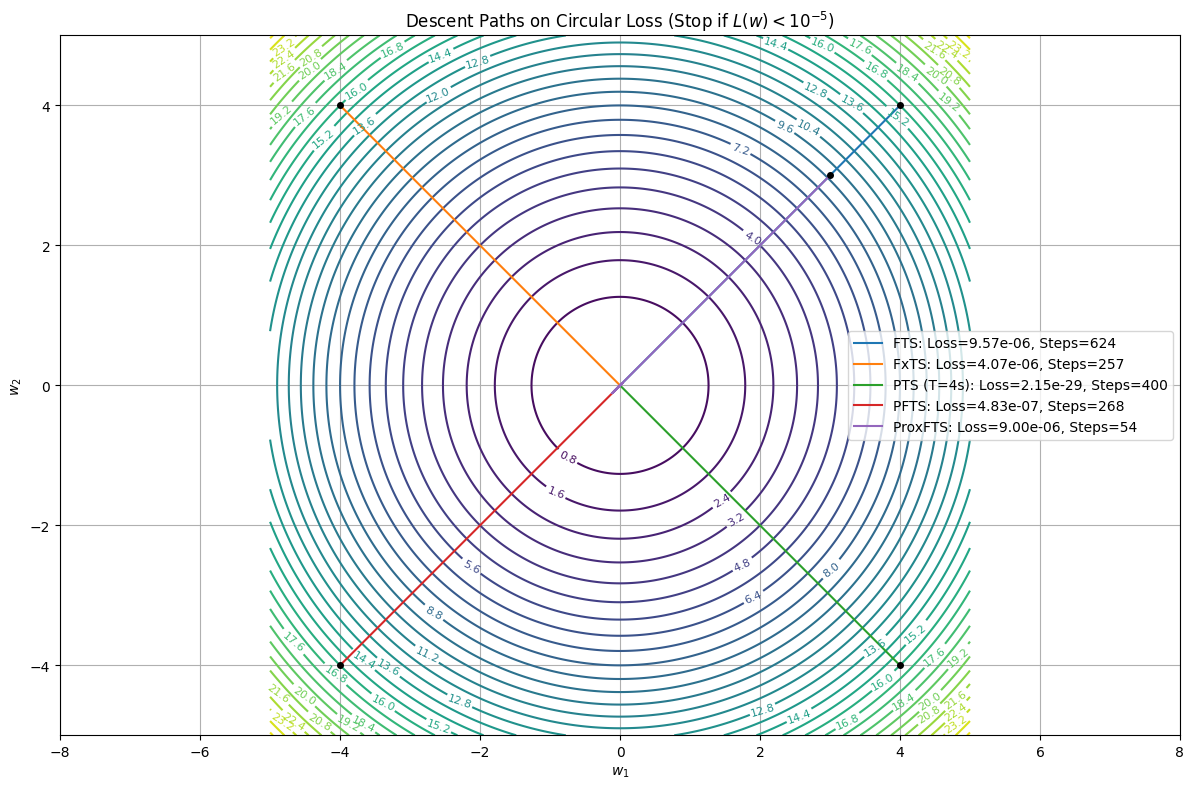

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Loss and gradient (circular) ----
def loss(w):
    return 0.5 * (w[0]**2 + w[1]**2)

def grad(w):
    return w

# ---- Gradient clipping ----
def clip_grad(g, max_norm):
    norm = np.linalg.norm(g)
    return g if norm <= max_norm else (g / norm) * max_norm

# ---- Step functions ----
def step_fts(w, eta, k, alpha):
    g = grad(w)
    u = k * np.sign(g) * np.abs(g)**alpha
    u = clip_grad(u, umax)
    return w - eta * u

def step_fxts(w, eta, k1, k2, alpha, beta):
    g = grad(w)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    u = clip_grad(u, umax)
    return w - eta * u

def step_pts(w, t, eta, T):
    g = grad(w)
    g = clip_grad(g, umax)
    scale = 1.0 / max(T - t, 1e-3)
    return w - eta * scale * g

def step_pfts(w, eta, k1, k2, alpha, beta):
    g = grad(w)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    return w - eta * np.clip(u, -umax, umax)

def step_proxfts(w, eta, k1, k2, alpha, beta, step, target_steps=100):
    g = grad(w)
    scale = max((target_steps - step) / target_steps, 0.05)
    u = k1 * np.sign(g) * np.abs(g)**alpha + k2 * np.sign(g) * np.abs(g)**beta
    return w - eta * scale * np.clip(u, -umax, umax)

# ---- Parameters ----
tolerance = 1e-5
max_steps = 1000
umax = 1.0

params = {
    "FTS": {"k": 1.0, "alpha": 0.5, "eta": 0.01},
    "FxTS": {"k1": 6.0, "k2": 7.0, "alpha": 0.5, "beta": 1.5, "eta": 0.022},
    "PTS": {"T": 4.0, "eta": 0.01},
    "PFTS": {"k1": 5.0, "k2": 6.0, "alpha": 0.5, "beta": 1.5, "eta": 0.015},
    "ProxFTS": {"k1": 100.0, "k2": 120.0, "alpha": 0.5, "beta": 1.5, "eta": 0.18}
}

methods = {
    "FTS": {"color": "tab:blue"},
    "FxTS": {"color": "tab:orange"},
    "PTS (T=4s)": {"color": "tab:green"},
    "PFTS": {"color": "tab:red"},
    "ProxFTS": {"color": "tab:purple"}
}

# ---- Unique starting points ----
starting_points = {
    "FTS": np.array([4.0, 4.0]),
    "FxTS": np.array([-4.0, 4.0]),
    "PTS (T=4s)": np.array([4.0, -4.0]),
    "PFTS": np.array([-4.0, -4.0]),
    "ProxFTS": np.array([3.0, 3.0])
}

# ---- Run each method ----
results = {}
for name, info in methods.items():
    w = starting_points[name].copy()
    path = [w.copy()]
    method_key = name.split()[0]
    for i in range(max_steps):
        t = i * params[method_key]["eta"]
        if name == "FTS":
            p = params["FTS"]
            w = step_fts(w, p["eta"], p["k"], p["alpha"])
        elif name == "FxTS":
            p = params["FxTS"]
            w = step_fxts(w, p["eta"], p["k1"], p["k2"], p["alpha"], p["beta"])
        elif name.startswith("PTS"):
            p = params["PTS"]
            w = step_pts(w, t, p["eta"], p["T"])
        elif name == "PFTS":
            p = params["PFTS"]
            w = step_pfts(w, p["eta"], p["k1"], p["k2"], p["alpha"], p["beta"])
        elif name == "ProxFTS":
            p = params["ProxFTS"]
            w = step_proxfts(w, p["eta"], p["k1"], p["k2"], p["alpha"], p["beta"], i)
        path.append(w.copy())
        if loss(w) < tolerance:
            break
    steps = len(path) - 1
    print(f"{name} converged in {steps} steps, final loss={loss(w):.2e}")
    results[name] = {
        "path": np.array(path),
        "steps": steps,
        "final_loss": loss(path[-1]),
        "color": info["color"]
    }

# ---- Plot contours and paths ----
w1_vals = np.linspace(-5, 5, 300)
w2_vals = np.linspace(-5, 5, 300)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = 0.5 * (W1**2 + W2**2)

plt.figure(figsize=(12, 8))
cs = plt.contour(W1, W2, Z, levels=40, cmap="viridis")
plt.clabel(cs, inline=True, fontsize=8)

for name, res in results.items():
    label = f"{name}: Loss={res['final_loss']:.2e}, Steps={res['steps']}"
    plt.plot(res["path"][:, 0], res["path"][:, 1], label=label, color=res["color"])
    plt.plot(*res["path"][0], 'ko', markersize=4)  # Starting point

plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title("Descent Paths on Circular Loss (Stop if $L(w) < 10^{-5}$)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
